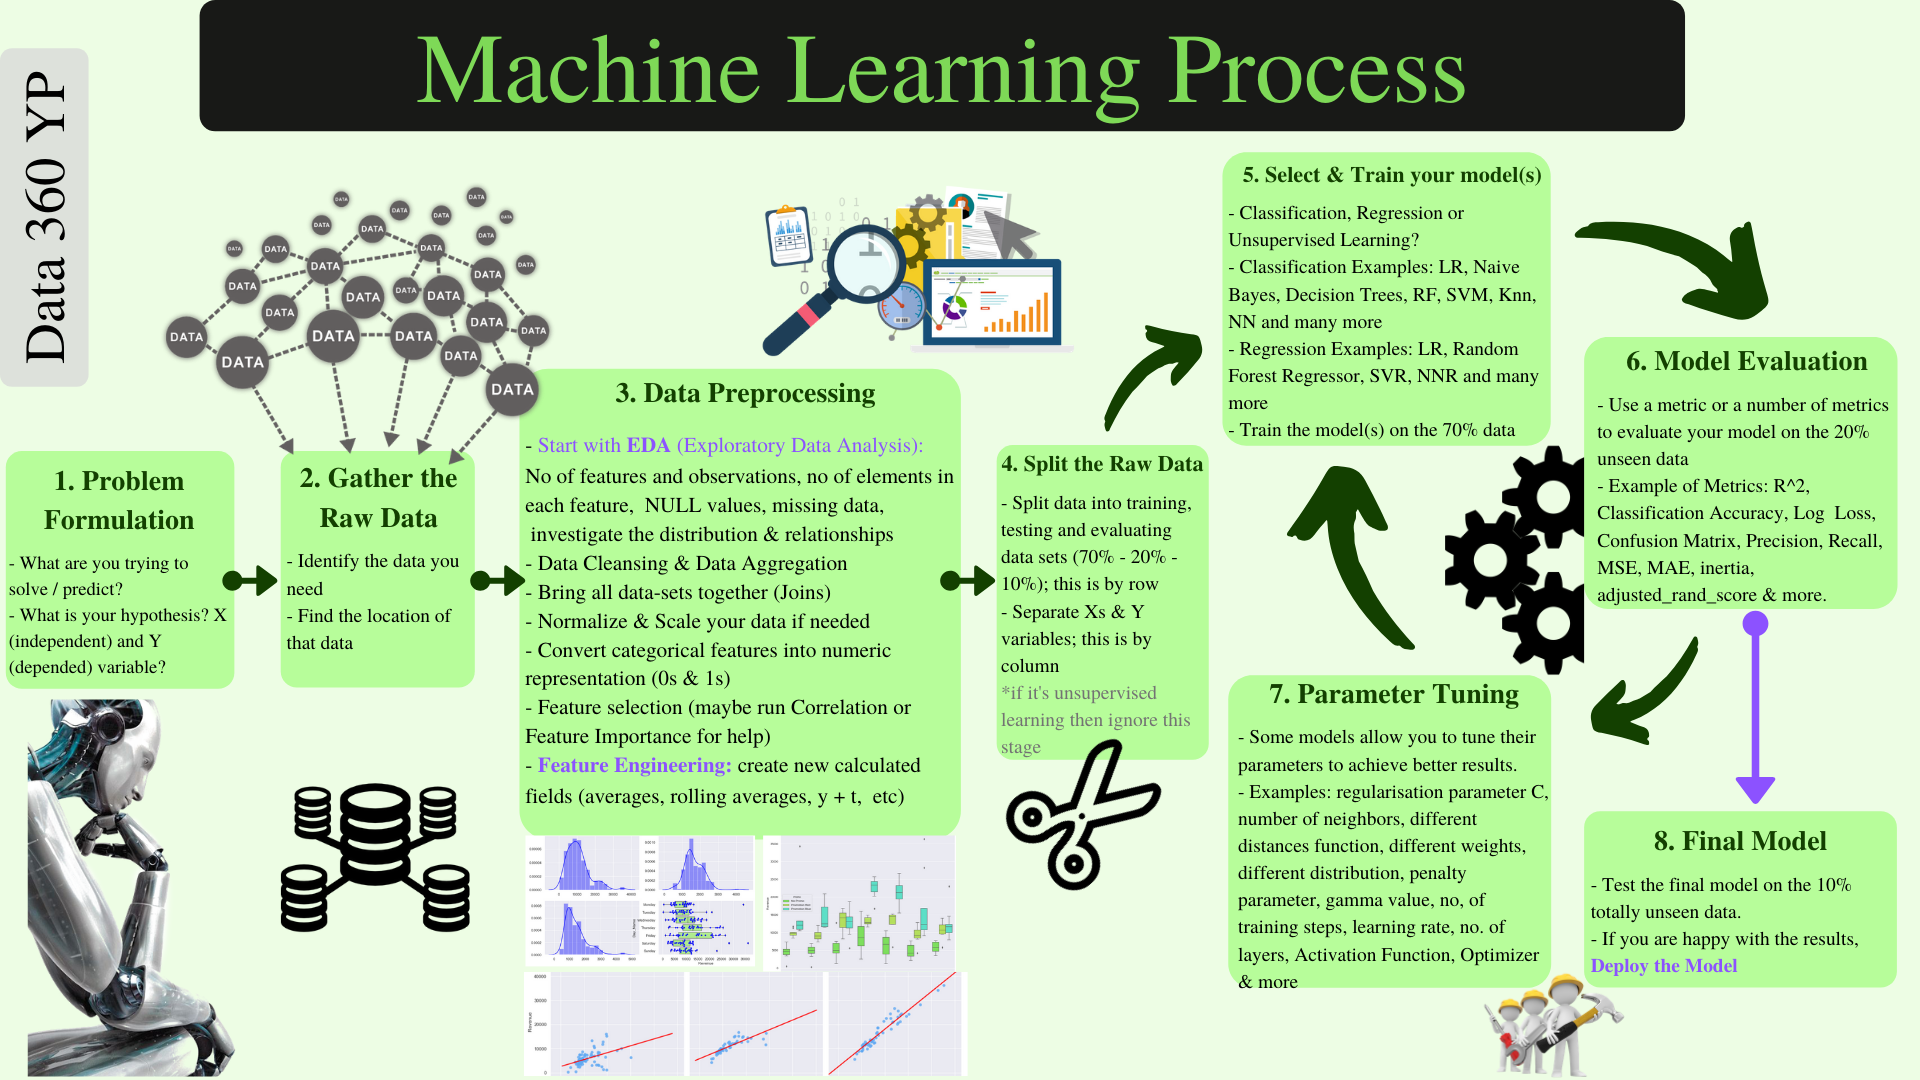

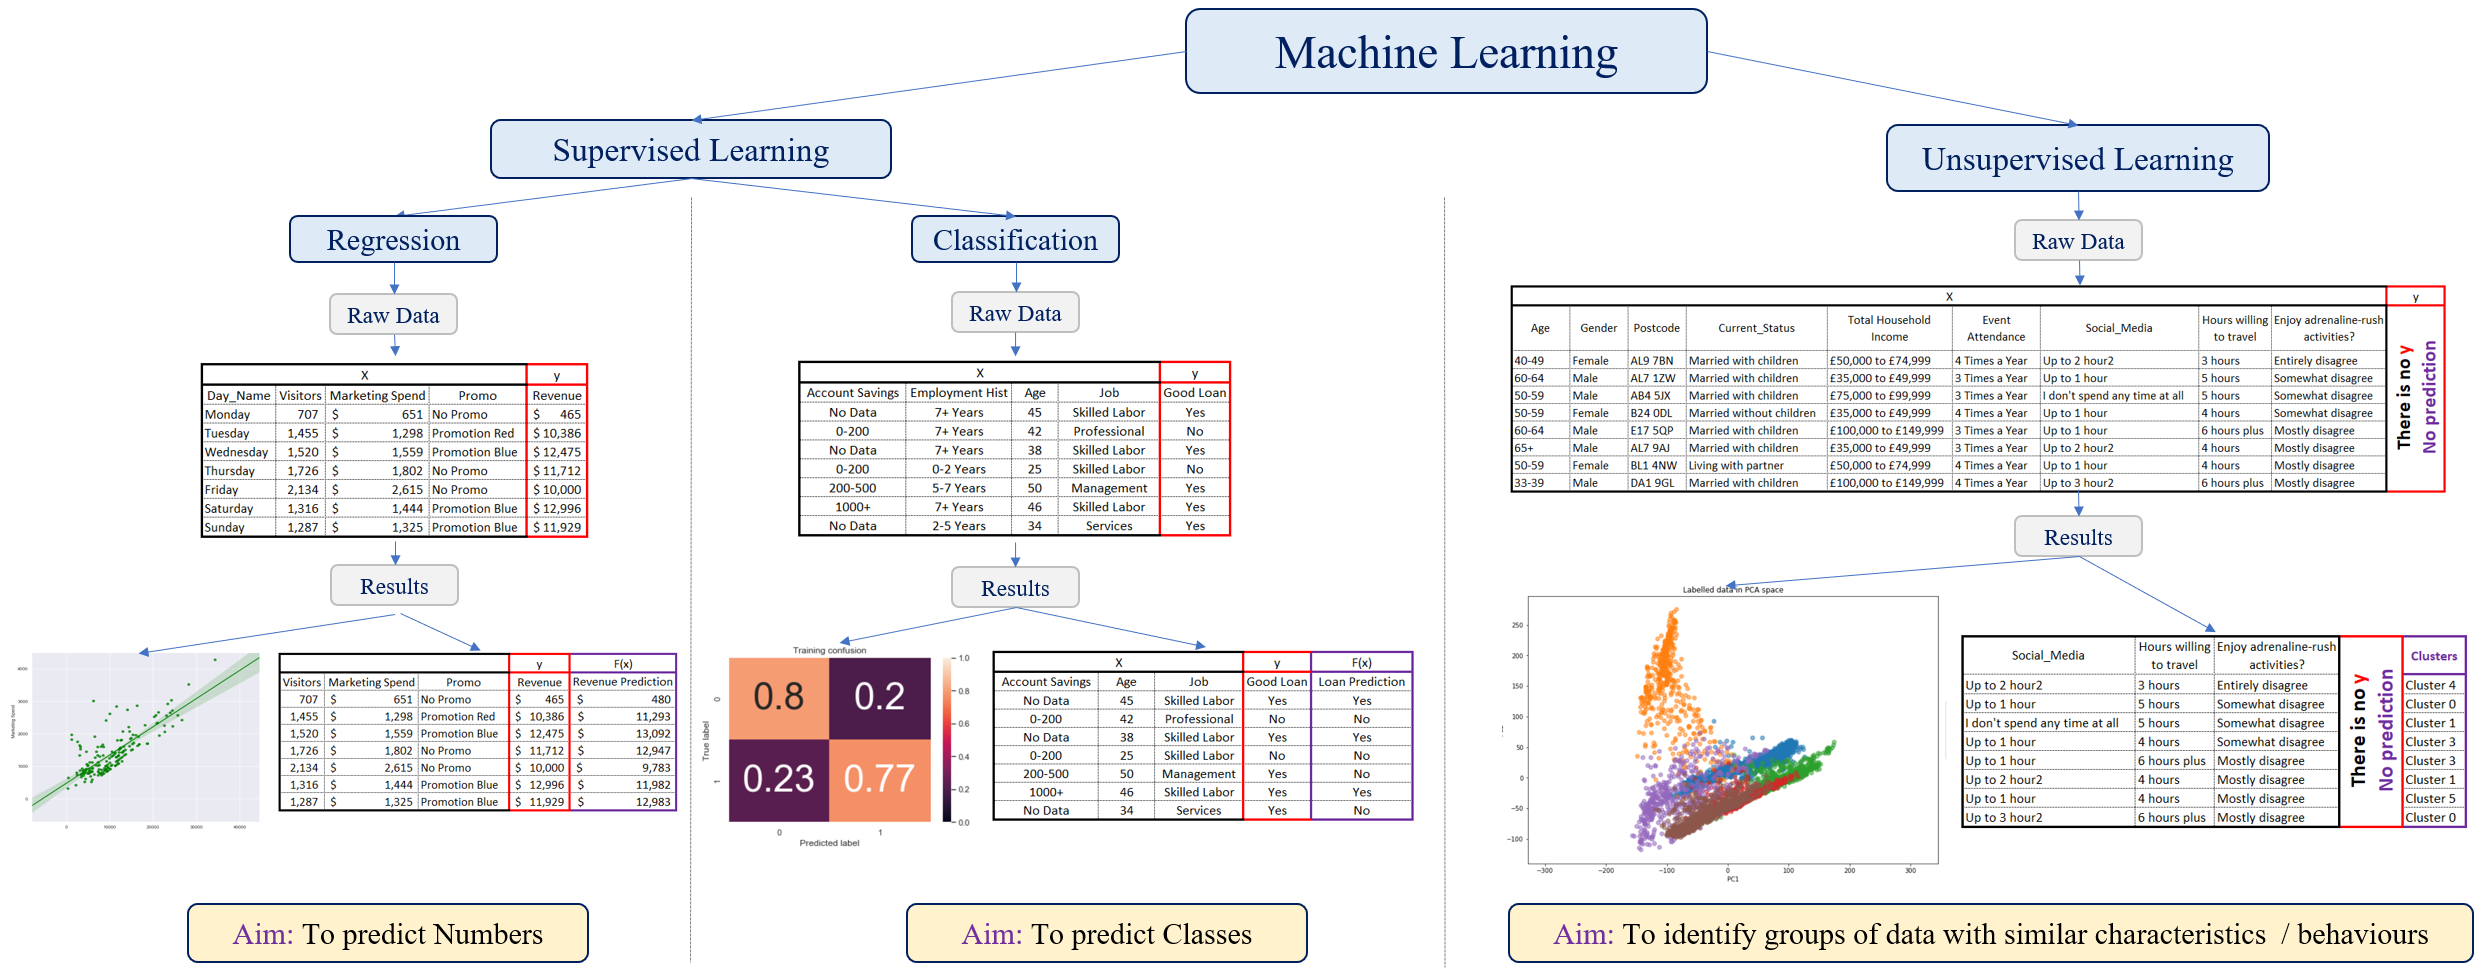

**The main use of unsupervised learning is to group data which is having similar charcteristic,we have to form group those data points in a specific group and generate few insights from that data!,algorithms like Kmeans Clustring and DBSCAN clustering are widely used!**


**The automated process works in this way : {Excel->Sql->Python->Sql->PowerBI},so this flow means that the data will be stored in the database or cloud,we have to retrive the data from there and then generate some valuable insights and then push back thos valuable insights back to the database,and then as a buisness requirement we have to build an automated application which will display the insights now and then even if new data comes,which always comes!,the software which is used to generate the insights is PowerBI or Tableu,we will be using PowerBI which we will link with Microsoft SQL server database and draw the insights in visual form!**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.cluster import KMeans,k_means

%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Pitsillides91/Python-Tutorials/master/Unsupervised%20Learning/Events%20Raw%20Data.csv',
                header=0)

df.head()

CUSTOMER    Age  Gender Postcode         District           Constituency  \
0         1  40-49  Female  AL9 7BN  Welwyn Hatfield        Welwyn Hatfield   
1         2  60-64    Male  AL7 1ZW  Welwyn Hatfield        Welwyn Hatfield   
2         3  50-59    Male  AB4 5JX    Aberdeenshire       Banff and Buchan   
3         4  50-59  Female  B24 0DL       Birmingham  Birmingham, Erdington   
4         5  60-64    Male  E17 5QP   Waltham Forest            Walthamstow   

    latitude  longitude            Current_Status Total_Household_Income  \
0  51.727429  -0.183648     Married with children       50,000 to 74,999   
1  51.804482  -0.195898     Married with children       35,000 to 49,999   
2  57.692200  -2.022295     Married with children       75,000 to 99,999   
3  52.526595  -1.822211  Married without children       35,000 to 49,999   
4  51.593979  -0.040803     Married with children     100,000 to 149,999   

  How often you attend Entertaining events in a year?  \
0                                     4 Times a Year    
1                                     3 Times a Year    
2                                     3 Times a Year    
3                                     1 Times a Year    
4                                     3 Times a Year    

                    Social_Media  \
0                   Up to 1 hour   
1                   Up to 1 hour   
2  I don't spend any time at all   
3                     Half a day   
4                   Up to 1 hour   

  How many hours are you willing to travel to attend an event?  \
0                                            3 hours             
1                                            5 hours             
2                                            5 hours             
3                                             1 hour             
4                                       6 hours plus             

  Do you enjoy adrenaline-rush activities?  \
0                        Entirely disagree   
1                        Somewhat disagree   
2                        Somewhat disagree   
3                           Entirely agree   
4                          Mostly disagree   

  Are food areas, coffee areas, bars & toilets important to you?  \
0                                     Entirely agree               
1                                     Entirely agree               
2                                     Somewhat agree               
3                         Neither agree nor disagree               
4                         Neither agree nor disagree               

  What is your favourite attraction from below:  \
0                                       Ice Bar   
1                           Happy Rollercoaster   
2                           Happy Rollercoaster   
3                      Crazy rollercoaster ride   
4                               Kids Playground   

  Were you satisfied with the last event you attended with us?  \
0                                     Somewhat agree             
1                                       Mostly agree             
2                                       Mostly agree             
3                                     Somewhat agree             
4                                     Entirely agree             

  Would you recommend our events to other people?  \
0                               Somewhat Unlikely   
1                                 Somewhat Likely   
2                                 Mostly Unlikely   
3                                 Somewhat Likely   
4                                   Very Unlikely   

  Did you find our events value for money?  
0                        Somewhat disagree  
1                        Entirely disagree  
2                        Entirely disagree  
3                        Somewhat disagree  
4                           Entirely agree

In [3]:
df.shape

(14783, 19)

In [4]:
def unique(df):
    for i in df.columns:
        print(f' Col {i} has {df[i].unique()}')
        
        print("="*75)
        


In [5]:
unique(df)

 Col CUSTOMER has [    1     2     3 ... 16264 16266 16267]
 Col Age has ['40-49' '60-64' '50-59' '65 or older' '33-39' '50-60' '50-61' '50-62'
 '50-63' '50-64' '26-32' '21-25' '17 or younger' '18-20']
 Col Gender has ['Female' 'Male']
 Col Postcode has ['AL9 7BN' 'AL7 1ZW' 'AB4 5JX' ... 'CM8 1FU' 'DD8 3JF' 'EH12 7PG']
 Col District has ['Welwyn Hatfield' 'Aberdeenshire' 'Birmingham' 'Waltham Forest' 'Bolton'
 'Dartford' 'Bury' 'Aylesbury Vale' 'Colchester' 'Bassetlaw' 'Midlothian'
 'Carlisle' 'Angus' 'County Durham' 'Waverley' 'South Derbyshire'
 'Glasgow City' 'Enfield' 'Wealden' 'Merton'
 'Bournemouth, Christchurch and Poole' 'Renfrewshire' 'Hart' 'Allerdale'
 'North Lincolnshire' 'Dover' 'Falkirk' 'Maldon' 'Nuneaton and Bedworth'
 'Solihull' 'Chelmsford' 'Hackney' 'Newry, Mourne and Down' 'Gloucester'
 'Armagh City, Banbridge and Craigavon' 'Warwick' 'Croydon' 'Camden'
 'Folkestone and Hythe' 'Babergh' 'Herefordshire, County of' 'Belfast'
 'Aberdeen City' 'City of Edinburgh' 'Clack

In [6]:
pd.set_option('display.max_rows',None)
catvars = df.select_dtypes(['object']).columns
numvars = df.select_dtypes(['int64','float64']).columns


In [7]:
def valuecounts(df):
    for i in df.columns:
        print(f' Column {i} has {df[i].value_counts()}')
        print("="*75)

In [8]:
valuecounts(df[catvars])

 Column Age has 50-59            3780
40-49            3148
65 or older      2539
60-64            1619
33-39            1552
26-32            1337
21-25             674
18-20             119
17 or younger      10
50-64               1
50-62               1
50-61               1
50-63               1
50-60               1
Name: Age, dtype: int64
 Column Gender has Male      10581
Female     4202
Name: Gender, dtype: int64
 Column Postcode has EN3 4YQ     6
B61 8WQ     3
CV23 0WX    2
BA13 4DY    2
CF4 6NZ     2
AB3 3LE     2
G66 4YA     2
E14 3RE     2
EN1 1QH     2
EX5 2HU     2
CV22 5QG    2
BN14 7TJ    2
BB8 8NT     2
CB1 5RG     2
DT11 1DA    2
CB8 7LA     2
BS8 3RZ     2
BN21 2UQ    2
EX4 5EN     2
BS24 6RU    2
BS12 5NN    2
DL2 3TT     2
CA11 1SS    2
AB16 5XD    2
CR5 1PB     2
EC1V 7DJ    2
DN3 3LU     2
DN4 5ND     2
DA1 9BN     2
G64 1HT     2
AB3 2TS     2
BB1 9AB     2
BL9 5DW     2
GL51 5NE    2
BN43 5PZ    2
GU16 5BH    2
CM11 2QY    2
HA0 4HL     2
HA7 9HH     2
BT7 1XA

In [9]:
df.isnull().sum()

CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            5
How often you attend Entertaining events in a year?               5
Social_Media                                                      5
How many hours are you willing to travel to attend an event?      5
Do you enjoy adrenaline-rush activities?                          5
Are food areas, coffee areas, bars & toilets imp

**The rows of the particular column which have the null value,for ex i wanted to get the rows where Total_household_income is null,i can get it by following as shown ↓**

In [10]:
df[df['Total_Household_Income'].isnull()]

CUSTOMER    Age  Gender Postcode District Constituency   latitude  \
21        23  50-60  Female  EN3 4YQ  Enfield     Edmonton  51.643546   
22        24  50-61  Female  EN3 4YQ  Enfield     Edmonton  51.643546   
23        25  50-62  Female  EN3 4YQ  Enfield     Edmonton  51.643546   
24        26  50-63  Female  EN3 4YQ  Enfield     Edmonton  51.643546   
25        27  50-64  Female  EN3 4YQ  Enfield     Edmonton  51.643546   

    longitude         Current_Status Total_Household_Income  \
21  -0.029532  Married with children                    NaN   
22  -0.029532  Married with children                    NaN   
23  -0.029532  Married with children                    NaN   
24  -0.029532  Married with children                    NaN   
25  -0.029532  Married with children                    NaN   

   How often you attend Entertaining events in a year? Social_Media  \
21                                                NaN           NaN   
22                                                NaN           NaN   
23                                                NaN           NaN   
24                                                NaN           NaN   
25                                                NaN           NaN   

   How many hours are you willing to travel to attend an event?  \
21                                                NaN             
22                                                NaN             
23                                                NaN             
24                                                NaN             
25                                                NaN             

   Do you enjoy adrenaline-rush activities?  \
21                                      NaN   
22                                      NaN   
23                                      NaN   
24                                      NaN   
25                                      NaN   

   Are food areas, coffee areas, bars & toilets important to you?  \
21                                                NaN               
22                                                NaN               
23                                                NaN               
24                                                NaN               
25                                                NaN               

   What is your favourite attraction from below:  \
21                                           NaN   
22                                           NaN   
23                                           NaN   
24                                           NaN   
25                                           NaN   

   Were you satisfied with the last event you attended with us?  \
21                                                NaN             
22                                                NaN             
23                                                NaN             
24                                                NaN             
25                                                NaN             

   Would you recommend our events to other people?  \
21                                             NaN   
22                                             NaN   
23                                             NaN   
24                                             NaN   
25                                             NaN   

   Did you find our events value for money?  
21                                      NaN  
22                                      NaN  
23                                      NaN  
24                                      NaN  
25                                      NaN

In [11]:
df = df.dropna(subset=['Total_Household_Income'])

df.isnull().sum()

CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            0
How often you attend Entertaining events in a year?               0
Social_Media                                                      0
How many hours are you willing to travel to attend an event?      0
Do you enjoy adrenaline-rush activities?                          0
Are food areas, coffee areas, bars & toilets imp

In [12]:
cols = df.columns
cols

Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?'],
      dtype='object')

In [13]:
cols_to_use = ['Age', 'Gender','Current_Status', 'Total_Household_Income','How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?']

 count plot of the feature Age is shown ↓


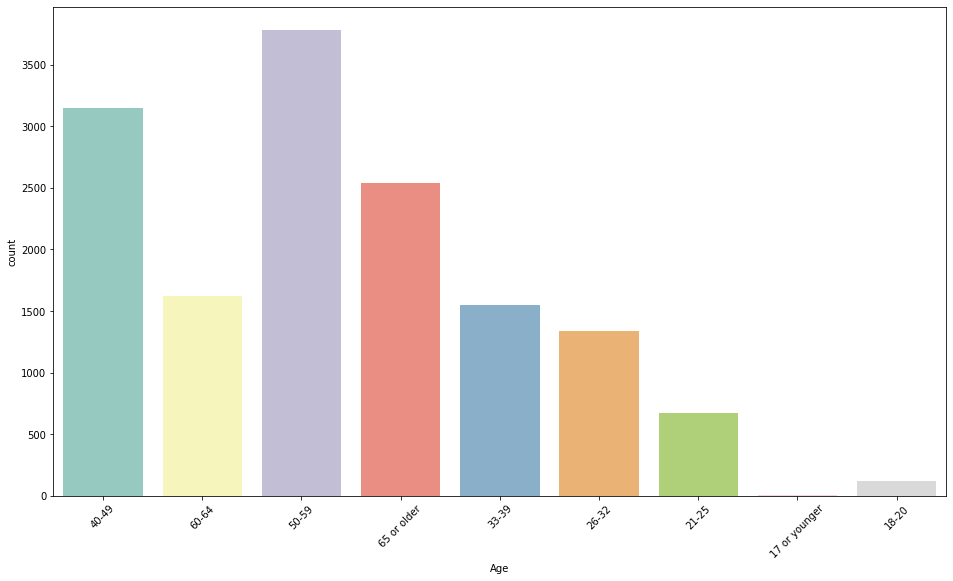

 count plot of the feature Gender is shown ↓


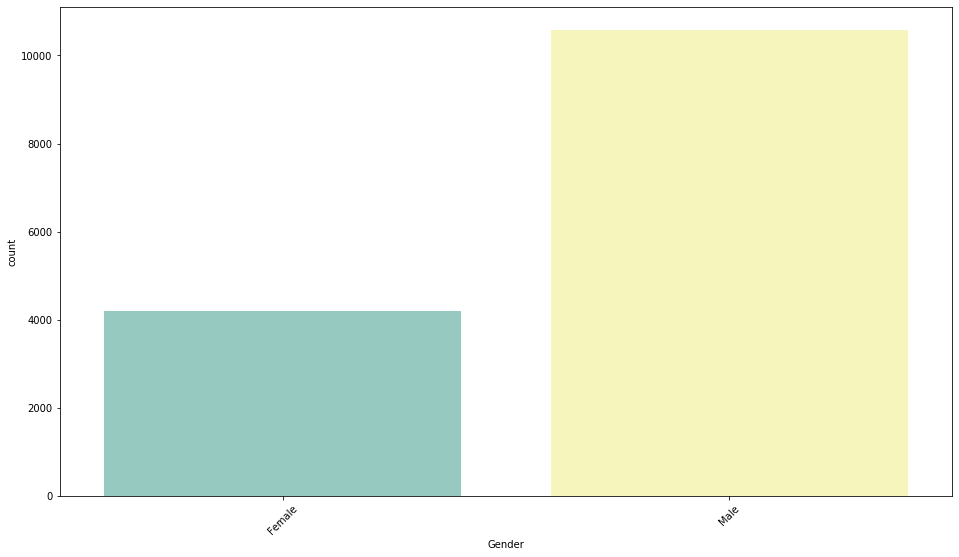

 count plot of the feature Current_Status is shown ↓


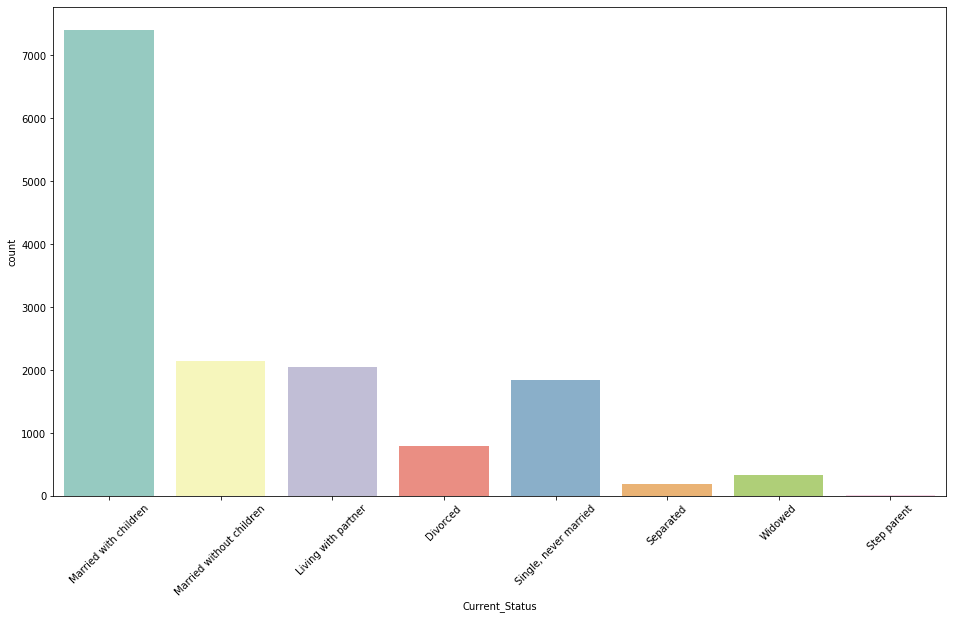

 count plot of the feature Total_Household_Income is shown ↓


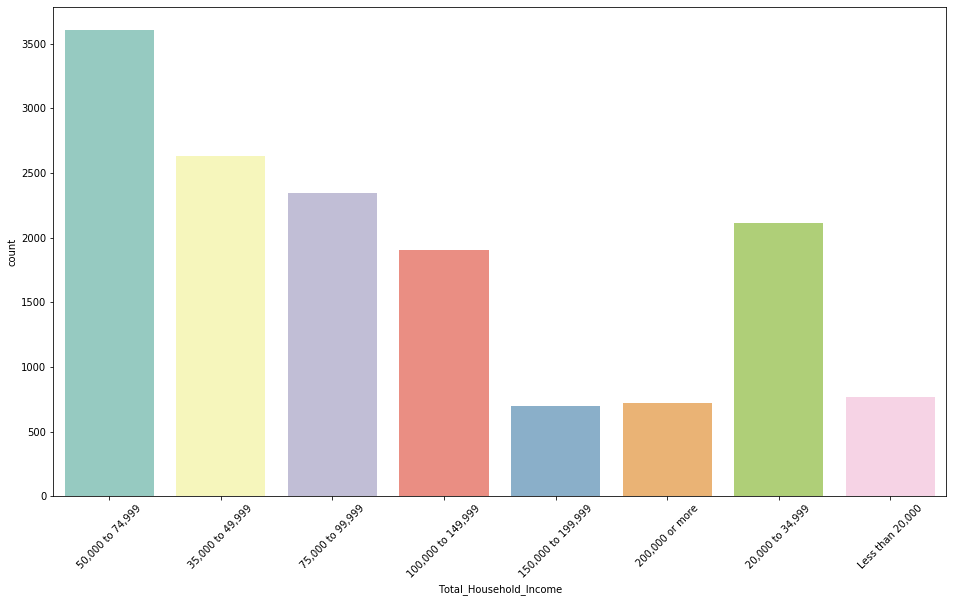

 count plot of the feature How often you attend Entertaining events in a year? is shown ↓


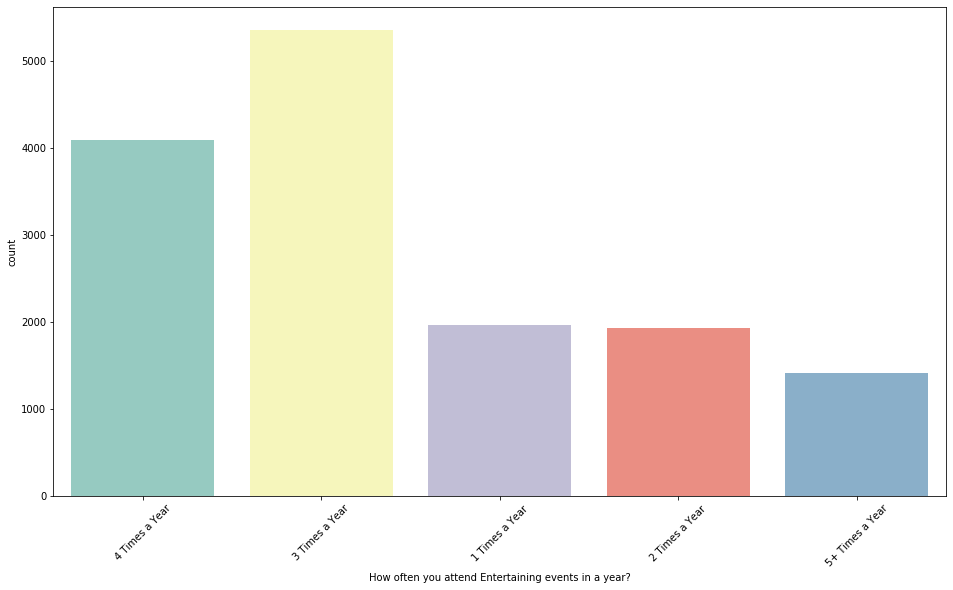

 count plot of the feature Social_Media is shown ↓


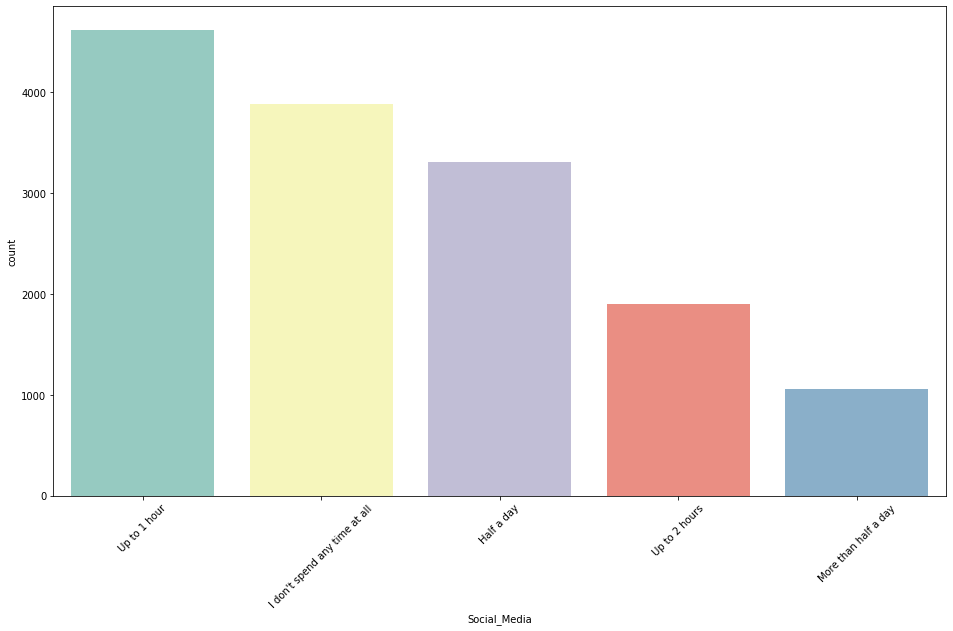

 count plot of the feature How many hours are you willing to travel to attend an event? is shown ↓


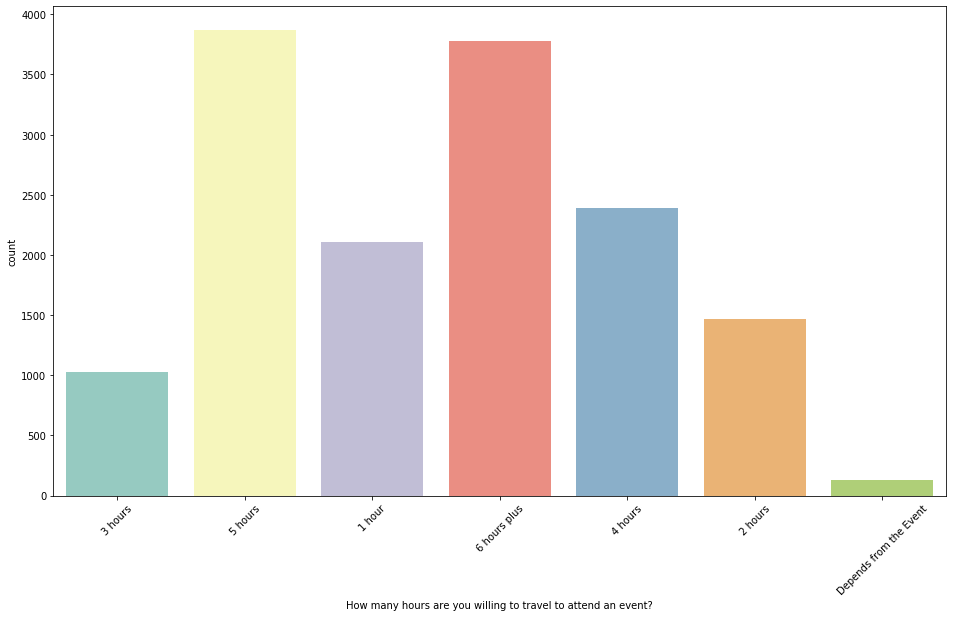

 count plot of the feature Do you enjoy adrenaline-rush activities? is shown ↓


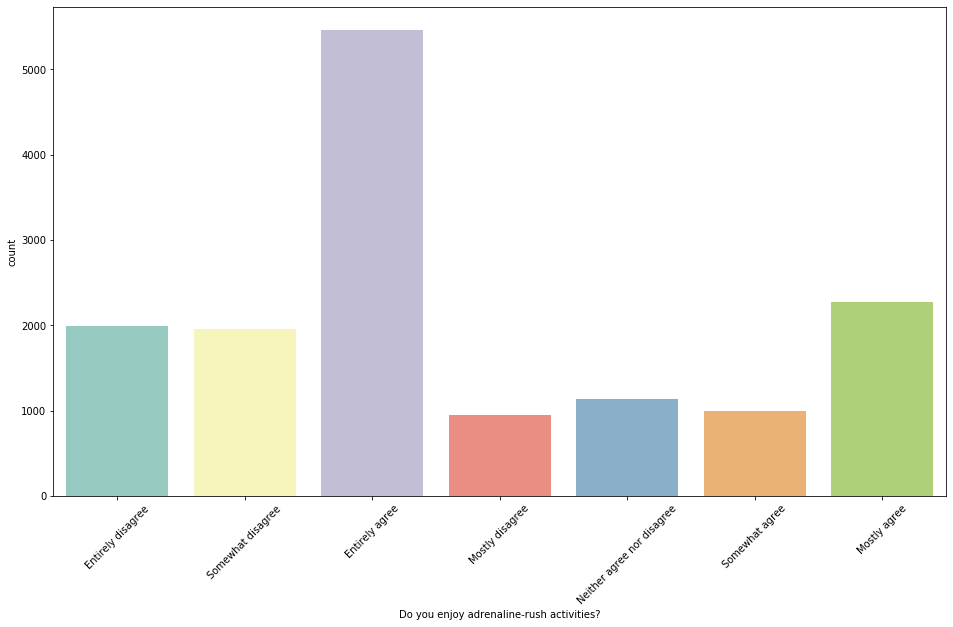

 count plot of the feature Are food areas, coffee areas, bars & toilets important to you? is shown ↓


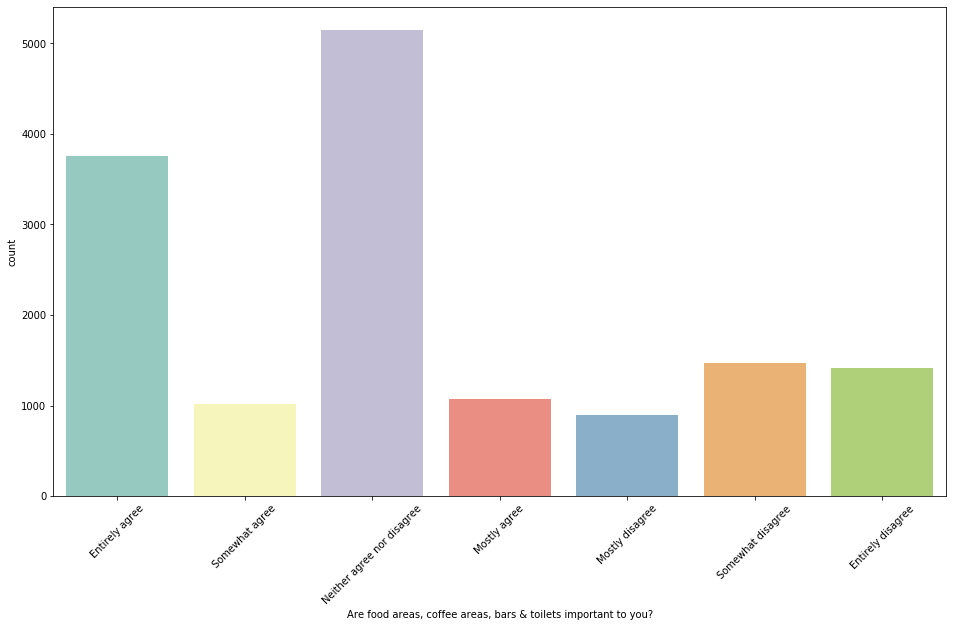

 count plot of the feature What is your favourite attraction from below: is shown ↓


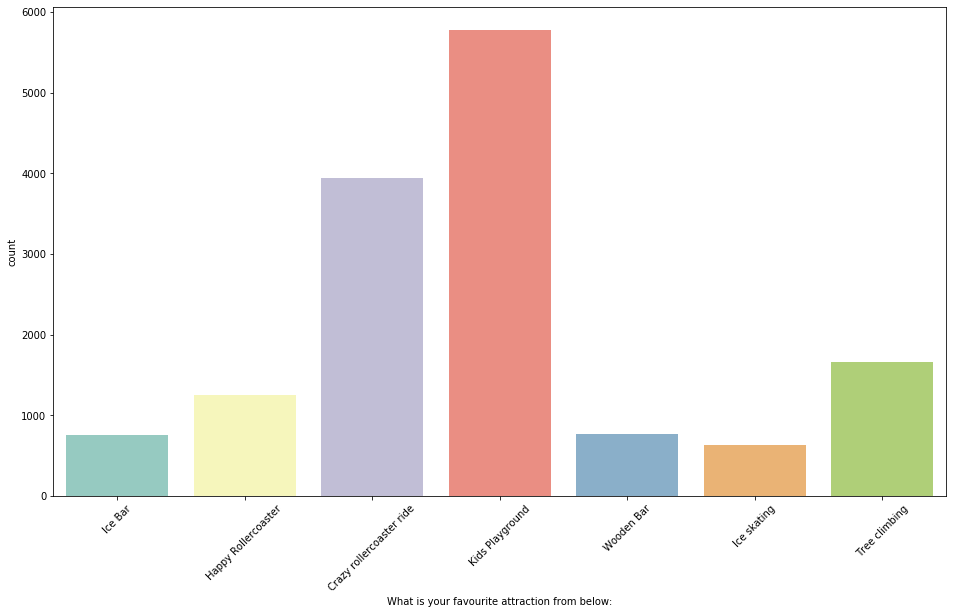

 count plot of the feature Were you satisfied with the last event you attended with us? is shown ↓


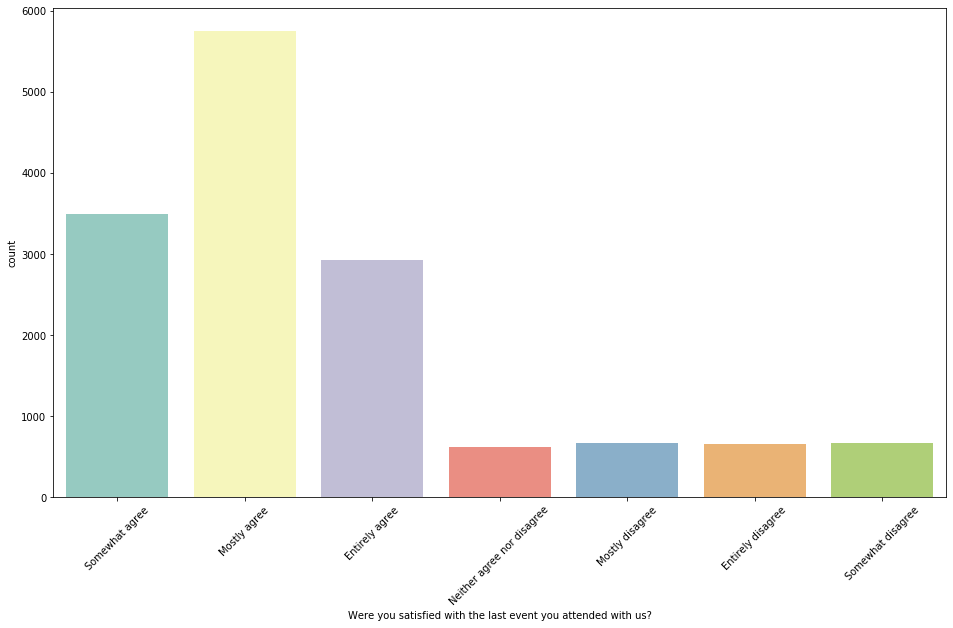

 count plot of the feature Would you recommend our events to other people? is shown ↓


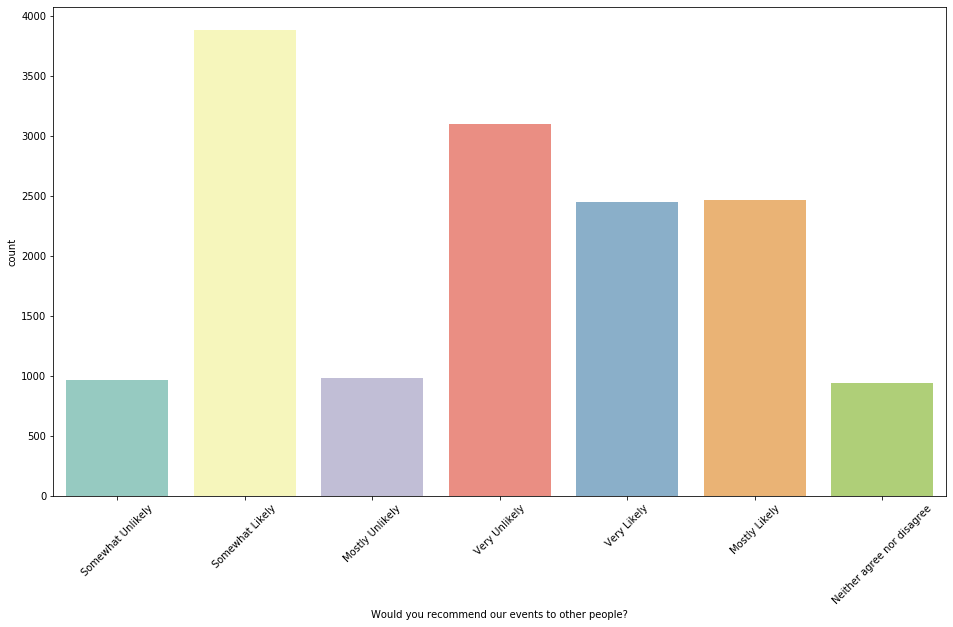

 count plot of the feature Did you find our events value for money? is shown ↓


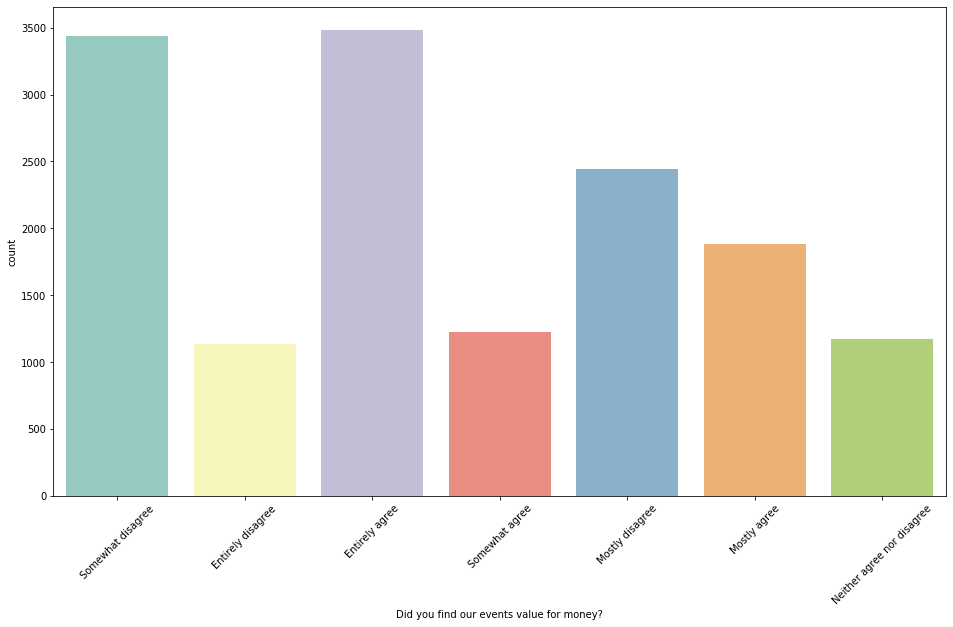

In [14]:
for i in cols_to_use:
    print(f' count plot of the feature {i} is shown ↓')
    plt.figure(figsize=(16,9))
    sn.countplot(df[i],palette='Set3')
    plt.xticks(rotation = 45)
    plt.show()

In [15]:
features = ['Age', 'Gender', 
       'Current_status', 'total_household_income',
       'how_often_you_attend_entertaining_events_in_a_year', 'social_media',
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event',
       'do_you_enjoy_adrenaline_rush_activities',
       'are_food_areas_coffee_areas_bars_toilets_important_to_you',
       'what_is_your_favourite_attraction_from_below','were_you_satisfied_with_the_last_event_you_attended_with_us',
       'would_you_recommend_our_events_to_other_people',
       'did_you_find_our_events_value_for_money']

In [16]:
features = [i.capitalize() for i in features]
features

['Age',
 'Gender',
 'Current_status',
 'Total_household_income',
 'How_often_you_attend_entertaining_events_in_a_year',
 'Social_media',
 'How_many_hours_are_you_willing_to_travel_to_attend_an_event',
 'Do_you_enjoy_adrenaline_rush_activities',
 'Are_food_areas_coffee_areas_bars_toilets_important_to_you',
 'What_is_your_favourite_attraction_from_below',
 'Were_you_satisfied_with_the_last_event_you_attended_with_us',
 'Would_you_recommend_our_events_to_other_people',
 'Did_you_find_our_events_value_for_money']

In [17]:
features = [features[i].replace("_"," ") for i in range(0,len(features))]
features

['Age',
 'Gender',
 'Current status',
 'Total household income',
 'How often you attend entertaining events in a year',
 'Social media',
 'How many hours are you willing to travel to attend an event',
 'Do you enjoy adrenaline rush activities',
 'Are food areas coffee areas bars toilets important to you',
 'What is your favourite attraction from below',
 'Were you satisfied with the last event you attended with us',
 'Would you recommend our events to other people',
 'Did you find our events value for money']

In [18]:
df.columns

Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?'],
      dtype='object')

In [19]:
to_use = ['Age', 'Gender','Current_Status', 'Total_Household_Income','How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?']

In [20]:
to_drop = []
for i in df.columns:
    if i not in to_use:
        to_drop.append(i)
        
to_drop

['CUSTOMER', 'Postcode', 'District', 'Constituency', 'latitude', 'longitude']

### Categorical Feature Encoding

In [21]:
df = df.drop(columns=to_drop)
data_to_use = pd.get_dummies(df,columns=to_use)
data_to_use.head()

Age_17 or younger  Age_18-20  Age_21-25  Age_26-32  Age_33-39  Age_40-49  \
0                  0          0          0          0          0          1   
1                  0          0          0          0          0          0   
2                  0          0          0          0          0          0   
3                  0          0          0          0          0          0   
4                  0          0          0          0          0          0   

   Age_50-59  Age_60-64  Age_65 or older  Gender_Female  ...  \
0          0          0                0              1  ...   
1          0          1                0              0  ...   
2          1          0                0              0  ...   
3          1          0                0              1  ...   
4          0          1                0              0  ...   

   Would you recommend our events to other people?_Somewhat Unlikely  \
0                                                  1                   
1                                                  0                   
2                                                  0                   
3                                                  0                   
4                                                  0                   

   Would you recommend our events to other people?_Very Likely  \
0                                                  0             
1                                                  0             
2                                                  0             
3                                                  0             
4                                                  0             

   Would you recommend our events to other people?_Very Unlikely  \
0                                                  0               
1                                                  0               
2                                                  0               
3                                                  0               
4                                                  1               

   Did you find our events value for money?_Entirely agree  \
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  1         

   Did you find our events value for money?_Entirely disagree  \
0                                                  0            
1                                                  1            
2                                                  1            
3                                                  0            
4                                                  0            

   Did you find our events value for money?_Mostly agree  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Did you find our events value for money?_Mostly disagree  \
0                                                  0          
1                                                  0          
2                                                  0          
3                                                  0          
4                                                  0          

   Did you find our events value for money?_Neither agree nor disagree  \
0                                                  0                     
1                                                  0                     
2                                                  0                     
3                                                  0                     
4                             

## K-Means Clustering

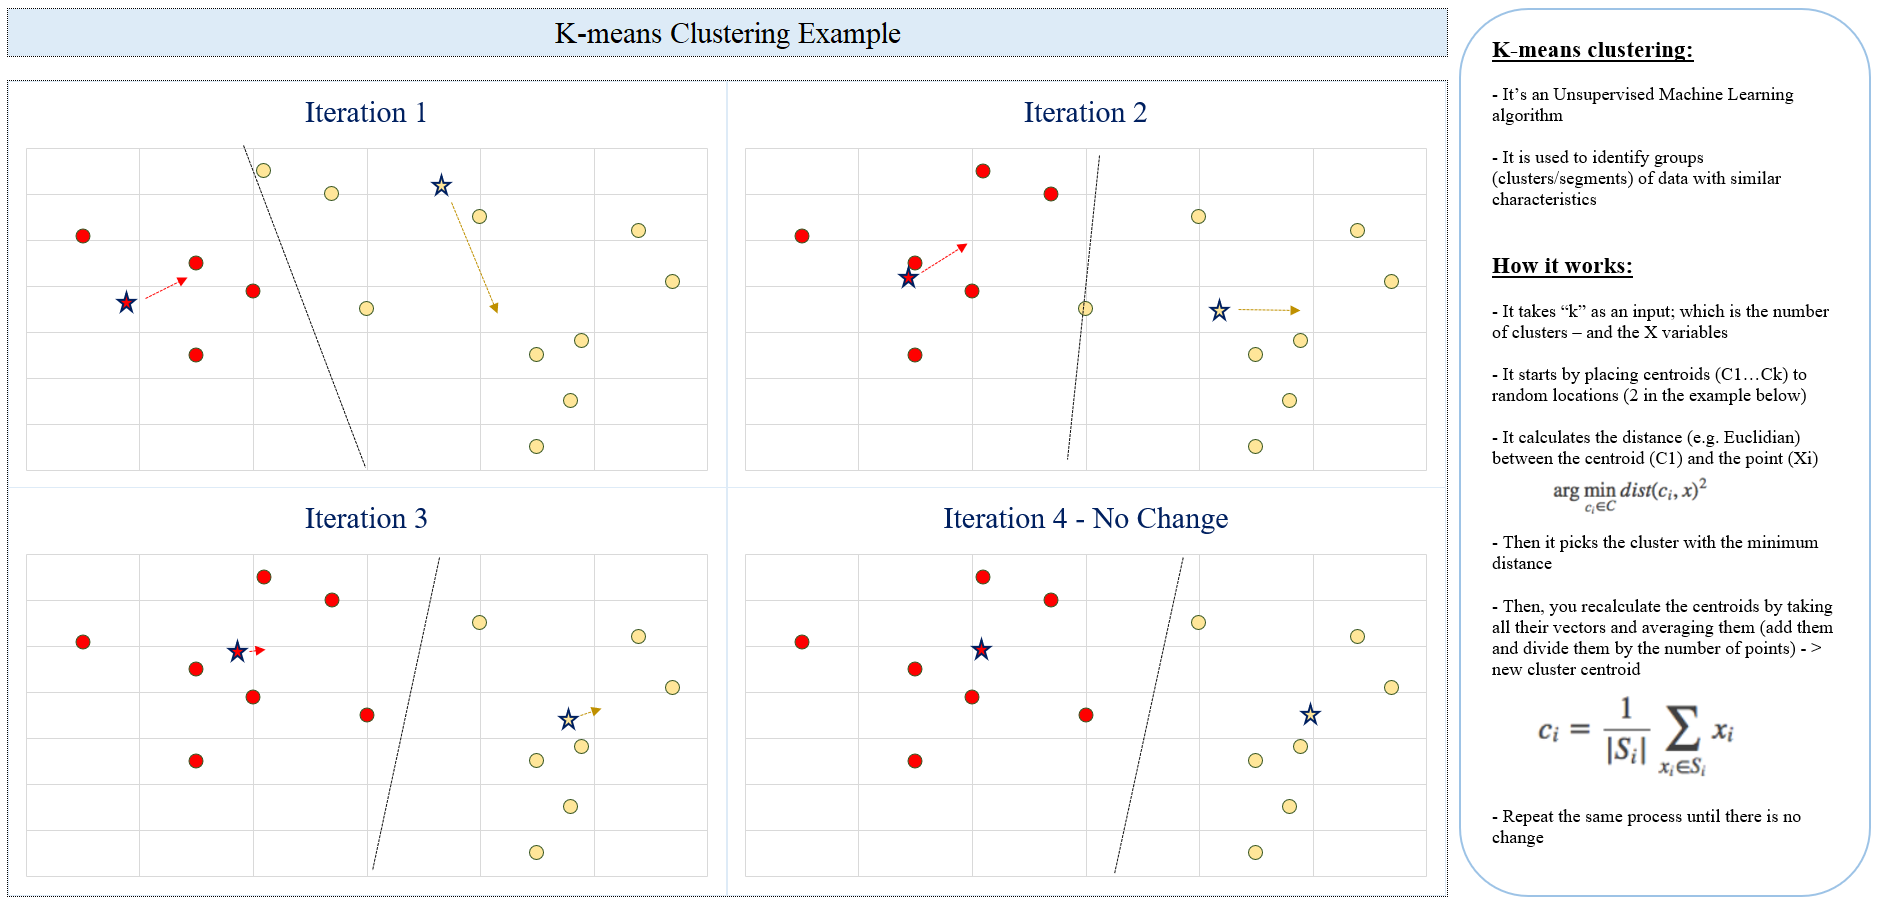

### What is Inertia


Inertia is the within-cluster sum of squares criterion. It is a metric that shows how internally coherent the clusters are. Inertia assumes that clusters are convex and isotropic; performs poorly elongated clusters, or manifolds with irregular shapes; better use hierarchical clustering here. Inertia also performs poorly in very high-dimensional spaces since Euclidean distances become inflated and no normalisation is applied beforehand; not a normalised metric.

In [22]:
'''
dataframe.values will turn the dataframe into numpy array,which is the one
which we will be using for making the clusters,in Kmeans clustering we set a 
predefined cluster value "k",stating that we need these many clusters
then based on the clusters the data kind of gets sepearted,based on some 
distance metric,now the goal is in each cluster we apply find the median 
of that cluster and find the eucledian or manhattan or minkowski distance
from all the data points to that point,and which eva point is nearer to that
datapoint,we will cluster them and then again apply the median thing,until and
unless we find a point where the distance between all clusters is same!!,so 
this was a jist of Kmeans!


'''

X_train = data_to_use.values

In [23]:
X_train = data_to_use.values

kmeans = KMeans(n_clusters=5,random_state=540)

kmeans = kmeans.fit(X_train)

print(f' The clusters are : {kmeans.labels_}')

print()

print(f' The inertia is : {kmeans.inertia_}')

 The clusters are : [3 3 3 ... 3 1 3]

 The inertia is : 100865.1789273626


In [24]:
kmeans.labels_.shape

(14778,)

**The cluster which is a list says in which cluster does the specific row belong to!,so as we had around 14778 rows after some data preprocessing,for each row the at the end a particular cluster is been identified!,if we want to know how many different kinds of clusters were made we can use this ↓**

In [25]:
clust_list = list(set(kmeans.labels_))

clust_list

[0, 1, 2, 3, 4]

**So as we mentioned in the begining that we will be providing 5 cluster and this proved to be that,lets find out how many are rows were assigned in each cluster we can use ↓**

In [26]:
labels = kmeans.labels_
labels = list(labels)
labels

[3,
 3,
 3,
 4,
 1,
 3,
 3,
 1,
 4,
 3,
 1,
 3,
 1,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 3,
 1,
 4,
 3,
 3,
 3,
 1,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 4,
 4,
 4,
 4,
 1,
 4,
 3,
 3,
 3,
 3,
 4,
 1,
 3,
 3,
 2,
 3,
 3,
 3,
 4,
 3,
 1,
 3,
 3,
 2,
 2,
 3,
 4,
 3,
 3,
 3,
 3,
 4,
 2,
 1,
 1,
 3,
 3,
 2,
 3,
 4,
 3,
 3,
 1,
 4,
 4,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 3,
 4,
 3,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 4,
 3,
 4,
 3,
 3,
 3,
 1,
 4,
 3,
 4,
 3,
 3,
 1,
 3,
 4,
 3,
 1,
 3,
 4,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 1,
 3,
 4,
 3,
 1,
 4,
 4,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 4,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 2,
 2,
 3,
 4,
 3,
 2,
 4,
 3,
 2,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 3,
 4,
 3,
 3,
 3,
 1,
 3,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 3,
 3,
 2,
 3,
 2,
 2,
 4,
 4,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,


In [27]:
clust_map = dict(zip(labels,map(labels.count,labels)))
clust_map

{3: 8491, 4: 1865, 1: 2208, 2: 1226, 0: 988}

**So the values of the dictionary indicate the number of rows which fell into the particular cluster!,so there are 8491 rows which fell under the cluster "3",there are 1865 rows which fell under cluster "2",so all the 8491 features were of type 3,i.e why they felt under cluster 3...in that way this works!**

**Inorder to check how good our clustering is done we use teh concept of `Inertia`,which says Inertia is the within-cluster sum of squares criterion. It is a metric that shows how internally coherent the clusters are.,how close the clusters are together,so if the value of inertia is as low as possible,the better our clusters are!,so this inertia is the value by which we can select how many number of clusters are to be considered!,so we will randomly run a for loop on few selected values of "k",and find the inertia for each k,which eva k gives the least inertia,is the value of k!**

In [28]:
kmeans.inertia_

100865.1789273626

In [29]:
k_list = []
inertia_list = []

for i in range(2,20):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans = kmeans.fit(X_train)
    k_list.append(i)
    inertia_list.append(kmeans.inertia_)
    
    


In [30]:
inertia_dict = dict(list(zip(k_list,inertia_list)))
inertia_dict = sorted(inertia_dict.items(),key=lambda x:x[1])
inertia_dict

[(19, 81795.49931888988),
 (18, 82415.23068530184),
 (17, 82932.3348416625),
 (16, 83704.59135440229),
 (15, 84324.3324418152),
 (14, 84864.04266668807),
 (13, 85823.52807353433),
 (12, 86675.13699623356),
 (11, 87564.59453185058),
 (10, 88489.95583067612),
 (9, 90006.05991540225),
 (8, 91590.34604024961),
 (7, 93814.51559690775),
 (6, 96432.68621313221),
 (5, 101900.29711124647),
 (4, 106337.17594801619),
 (3, 114905.38684266756),
 (2, 125619.02972065964)]

**So from the above code we can observe that if we use 19 clusters then the clustering will be perfect,i.e we will be having min distance,so in between 2 and 20 the more the clusters the less is the distance!,so if we use a large "k" value,we will get less distance!i.e less inertia value**


**So here if we use as many as possible clusters,this will result in for sure overfitting!,even though the inertia is less,but as more and more groups of data have been formed i.e clusters!,this clealry means that the model has performed fantanstic during the training process,but when the real world data is been passed,this model fails like a trash!!,because the model was highly overfitted,overfitted models will fit the data point to the perfection,if and only if thee value is "exactly" in the range!,if not then this fails,so using large values of "k",doesnt really mean that the model is robust,we have to choose an optimal value of k which will work for all cases,that we can do it using hyperparameter tuning!**

**One more way to select the optimal number of clusters is by using the graph!,we have to select that xaxis point after which the curve steeps down compeletely!!!,so if we observe the point 5,after that point the curve goes down steeply as shown,there's no up or down movement,only single movement going down steep,so after 5,everything is steep then,so 5 is also knwon as the `ELBOW POINT`,this is important!**

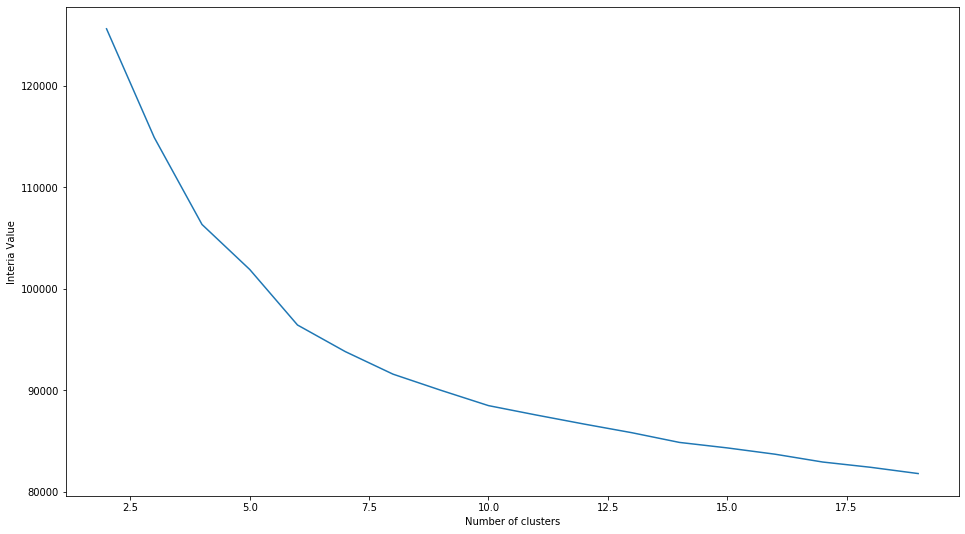

In [31]:
plt.figure(figsize = (16,9))
plt.plot(k_list,inertia_list)
plt.xlabel('Number of clusters')
plt.ylabel('Interia Value')
plt.show()

In [32]:
kmeans = KMeans(n_clusters=5,random_state=2)
kmeans = kmeans.fit(X_train)

labels = kmeans.labels_
predictions = kmeans.predict(X_train)


In [33]:
from collections import Counter

In [34]:
labels_map = Counter(labels)
predict_map = Counter(predictions)
labels_map,predict_map

(Counter({3: 4457, 4: 4083, 0: 2836, 1: 2178, 2: 1224}),
 Counter({3: 4457, 4: 4083, 0: 2836, 1: 2178, 2: 1224}))

## Importing Data From MySql

<blockquote><p><span style="font-size:14px"><span style="color:#000000"><span style="font-family:Courier New,Courier,monospace">import mysql.connector as sql</span></span></span></p><p><span style="font-size:14px"><span style="color:#000000"><span style="font-family:Courier New,Courier,monospace">import pandas as pd</span></span></span></p><p></p><p><span style="font-size:14px"><span style="color:#000000"><span style="font-family:Courier New,Courier,monospace">db_connection = sql.connect(host='hostname', database='db_name', user='username', password='password')</span></span></span></p><p><span style="font-size:14px"><span style="color:#000000"><span style="font-family:Courier New,Courier,monospace">db_cursor = db_connection.cursor()</span></span></span></p><p><span style="font-size:14px"><span style="color:#000000"><span style="font-family:Courier New,Courier,monospace">db_cursor.execute('SELECT * FROM table_name')</span></span></span></p><p></p><p><span style="font-size:14px"><span style="color:#000000"><span style="font-family:Courier New,Courier,monospace">table_rows = db_cursor.fetchall()</span></span></span></p><p></p><p><span style="font-size:14px"><span style="color:#000000"><span style="font-family:Courier New,Courier,monospace">df = pd.DataFrame(table_rows)</span></span></span></p></blockquote>

## Running Principal Component Analysis (PCA)

What is it?

->PCA is a dimensionality reduction technique that transforms a number of possibly correlated variables into a smaller number of uncorrelated variables; called principal components
The goal of PCA is to extract the most important information from the data table by compressing the size of the data set and keeping only the important information; then PCA computes new variables called principal components.


Additional Info:

->The first principal component is required to have the largest possible variance (inertia) and therefore this component will explain the largest part of the inertia / variance of the data table; hence the less principal components you have the lower the inertia will be after PCA.

->For every new component you add, the inertia will increase since the rotations are always performed in a subspace and the new axes will always explain less inertia than the original components; which are computed to be optimal

->Therefore, inertia should not be the criterium to choose the optimal number of principal component since the lower the components are the lower the inertia will be.
95% explained variance should be the criterium when choosing the number of principal components

####  Why dimensionality reduction could help k-means perform better:

->Why dimensionality reduction could help k-means perform better:
Kmeans is extremely sensitive to scale, and when you have a lot of attributes there is no true scale anymore. This is where PCA comes in since it whitens your data.

->By doing this, you will remove global correlation which can sometimes give better results. K-means is a "least squares" optimization problem; same with PCA.

->Kmeans tries to find the least squares partition of the data while PCA finds the least squares cluster membership vector. The first eigenvector has the largest variance (smallest inertia), hence splitting on this vector (which shows the cluster membership - not input data coordinates) means maximization of cluster variance; better fit for Kmeans.

->By maximizing between cluster variance, you minimize within-cluster variance. Therefore, applying PCA before clustering could potentially help you get better clusters (with more variance) in Kmeans

**The main role of PCA is to dervie new set of information from the existing one which is very important!,i.e PCA is used to find most important features from the dataset,i.e why it is used in dimenssion reductionality,and the first and the second dimenssionality components will give you most of the information which is required!**

In [35]:
from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [36]:
X_train.shape

(14778, 86)

`x_r = pca.fit(x).trasform(x)`=>this line will transform the X_train.shape which is having 86 cols into a dataset which will be having only 2 cols,so that we can visualise them!! 

`plt.scatter(x_r[y_num==i,0],x_r[y_num==i,1],color = color,label = target_name)` thsi scatter plot will plot : the scatter map of the datapoint which were present in (14k+..,86) into a dimennsion of (14k+,..2),here 2 cols means we will be having 2 axis [x,y],so in the xaxis one component is plotted which is x_r[y_num==i,0],here y_num is the `predictions` which were made using the kmeans algorithm!,and here "i" is the iterator which is looping through [0,1,2,3,4],which says that if any of the prediction i.e y_num is equal to any of the "i",the plot that datapoint into that cluster!!!,and we have choosen 5 different colors to identify all teh clusters uniquely,so on the x_axis we will plot one component i.e 0 and on the y_axis we will plot another component which is 1,as shown in the code below ↓

 The expalined variance ratio is : [0.16735568 0.07817705]


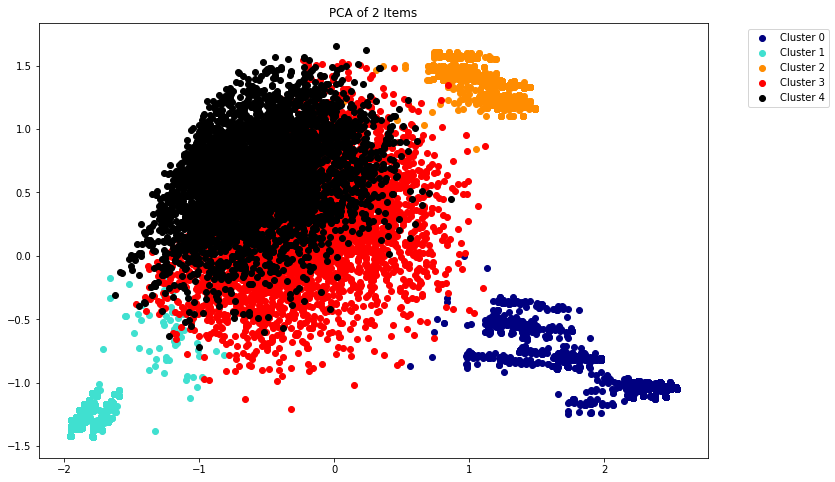

In [37]:
x = X_train

y_num = predictions


# as we had run 5 clusters in case of Kmeans,so we had made 5 clusters!
# so 5 lcusters means 5 different kind of regions to identify them i will
# name them as cluster_0,cluster_1...

target_names = ['Cluster'+' '+str(i) for i in range(5)]


# now here i choose ncomponents as 2,coz i want to visualise the data,
# basically n_components = "2" will reduce the data size which was 90k+,98
# those 98 cols will get reduced to 2,i.e we can visualise them on x and y axis
# and that is what is dimensionality reduction!


pca = PCA(n_components=2,random_state=453)

x_r = pca.fit(x).transform(x)


print(f' The expalined variance ratio is : {pca.explained_variance_ratio_}')


## Plotting the data


plt.figure(figsize=(12,8))

colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']


for color,i,target_name in zip(colors,[0,1,2,3,4],target_names):
    plt.scatter(x_r[y_num==i,0],x_r[y_num==i,1],color = color,label = target_name)
    
    
    
plt.legend(loc = 'best',shadow = False,scatterpoints = 1)

# pushing the legend to be outside of the visual

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()
    
    

**So we have used 2 components,so if we see the variance we find 16% and 78%,which is using 2 components we were able to visualise our clusters perfectly!,and as is said running 2 clusters itself will be providing most of the information!,this was just running 2 components,so that we can actually display how the clustering will look like!,we have to run the actually on all the columns of the dataset and the one which produces less variance is the best fit!**

In [38]:
x_components = X_train.shape[1]

pca = PCA(n_components=x_components,random_state=453)

x_r = pca.fit(x).transform(x)



## calculating 90% of variance

total_variance = sum(pca.explained_variance_)

print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")


'''
Here i am making 2lists one is of n_components and the other is 
related to the explained_variance_,so i will be getting the variance 
related to each component,↑ i have shown the dict format of the same
so inorder to represent the 2 lists we have used the dataframe,and then


As i want to reach 95% of the total variance,so i have to see which 
component count will acutally give me that,so for that i have used 
sum of starting from 0:30 then 0:35 then 0:40..so on and the last 
value which is used is 0:60,i.e the sum of variances obtained from 0 
ranging uptil 60 components and we find that at 53 or 55 components we
have recieved our goal!,so 55 components are required inorder to get 
95% of the total variance!!

'''


# Creating a df with the components and explained variance


a = zip(range(0,x_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])


# Trying to hit 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))
print("Variance explain with 53 n_compononets: ", sum(a["Explained Variance"][0:53]))
print("Variance explain with 55 n_compononets: ", sum(a["Explained Variance"][0:55]))
print("Variance explain with 60 n_compononets: ", sum(a["Explained Variance"][0:60]))

Total Variance in our dataset is:  9.789277508428572
The 95% variance we want to have is:  9.299813633007144

Variance explain with 30 n_compononets:  7.800063287617341
Variance explain with 35 n_compononets:  8.200059944222119
Variance explain with 40 n_compononets:  8.559358189926284
Variance explain with 41 n_compononets:  8.62520607241615
Variance explain with 50 n_compononets:  9.157222065601195
Variance explain with 53 n_compononets:  9.301801997586796
Variance explain with 55 n_compononets:  9.391528190593435
Variance explain with 60 n_compononets:  9.592274980903568


In [39]:
a_dict = dict(list(zip(range(0,x_components), pca.explained_variance_)))

a_dict



{0: 1.6382912401753913,
 1: 0.7652968568191741,
 2: 0.5706583706742681,
 3: 0.4171473747426547,
 4: 0.39614133452546474,
 5: 0.3423628282664607,
 6: 0.3292193404132275,
 7: 0.2510191882700632,
 8: 0.21892101833371336,
 9: 0.21342603388053552,
 10: 0.20563892463597017,
 11: 0.20000905698461025,
 12: 0.18099402199908518,
 13: 0.17866095821909342,
 14: 0.16172807410289852,
 15: 0.1545656199409961,
 16: 0.15290085739103365,
 17: 0.14415972420281933,
 18: 0.1359600914721738,
 19: 0.1301907772286072,
 20: 0.12566714235997387,
 21: 0.11743552072405186,
 22: 0.1124463838169116,
 23: 0.10334024357758333,
 24: 0.0982613378405713,
 25: 0.09567630590061872,
 26: 0.09428043940060969,
 27: 0.09182710118305512,
 28: 0.088623182424477,
 29: 0.08521393811124801,
 30: 0.08275255842106159,
 31: 0.08197507030554907,
 32: 0.07975781443673252,
 33: 0.07825898777386177,
 34: 0.07725222566757053,
 35: 0.07631295243178628,
 36: 0.07271057431956202,
 37: 0.07162239002071814,
 38: 0.07007010503880745,
 39: 0.068

In [40]:
'''

After finding the number of components which is giving you 
53% of the variance,your task is to fit the model which PCA returend
which is the "x_r" to the kmeans clustering inorder to get the 
inertia and the clusters,as shown ↓,the main reason why we use 
PCA in case of algo's like Kmeans and SVM is they all are based 
on distance and geometry,if the datapoints are less scattered and are
close with each other,they will be in a cluster and teh prediction could
be made quicker as the distance between 2 points is in a scale!,so always
decomposition/scaling is must in case you're using Kmeans/SVM/linearmodels!


'''


pca = PCA(n_components=53,random_state=453)

x_r = pca.fit(x).transform(x)

k_list = []
inertia_list = []

for i in range(2,20):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans = kmeans.fit(x_r)
    k_list.append(i)
    inertia_list.append(kmeans.inertia_)
    
    


In [41]:
new_dict = dict(list(zip(k_list,inertia_list)))

new_dict = sorted(new_dict.items(),key = lambda x:x[1])

new_dict

[(19, 75001.72681637434),
 (18, 75259.11417464052),
 (17, 76145.70914281036),
 (16, 76581.07335637884),
 (15, 77466.4709952395),
 (14, 78181.85252704621),
 (13, 78859.7013726724),
 (12, 79646.90783378614),
 (11, 80433.89541758143),
 (10, 81376.22733552412),
 (9, 82896.79444182497),
 (8, 84419.14306751567),
 (7, 86642.46030244164),
 (6, 89259.82741784162),
 (5, 93688.35998579249),
 (4, 99150.896586896),
 (3, 107706.76645179618),
 (2, 118418.02341932994)]

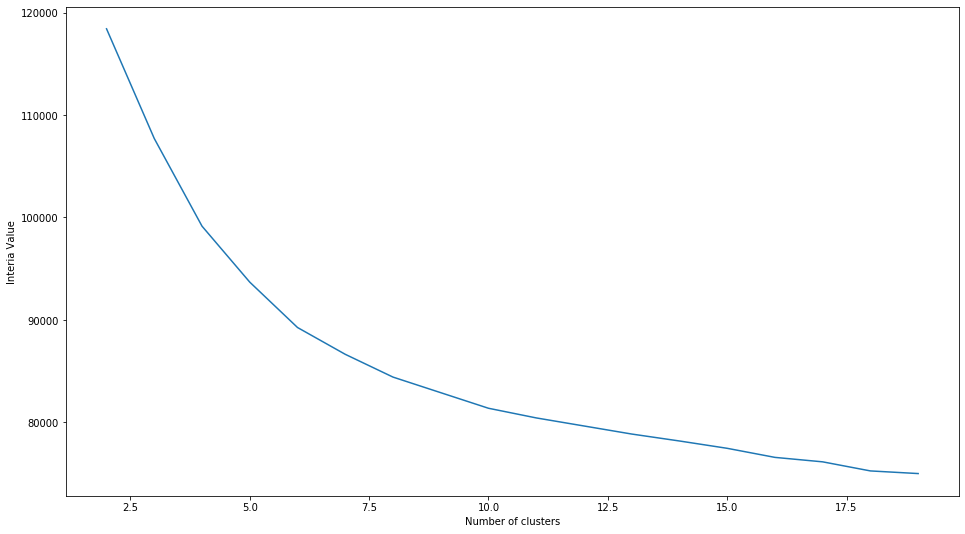

In [42]:
plt.figure(figsize=(16,9))

plt.plot(k_list,inertia_list)
plt.xlabel('Number of clusters')
plt.ylabel('Interia Value')
plt.show()

In [43]:
df.head(3)

Age  Gender         Current_Status Total_Household_Income  \
0  40-49  Female  Married with children       50,000 to 74,999   
1  60-64    Male  Married with children       35,000 to 49,999   
2  50-59    Male  Married with children       75,000 to 99,999   

  How often you attend Entertaining events in a year?  \
0                                     4 Times a Year    
1                                     3 Times a Year    
2                                     3 Times a Year    

                    Social_Media  \
0                   Up to 1 hour   
1                   Up to 1 hour   
2  I don't spend any time at all   

  How many hours are you willing to travel to attend an event?  \
0                                            3 hours             
1                                            5 hours             
2                                            5 hours             

  Do you enjoy adrenaline-rush activities?  \
0                        Entirely disagree   
1                        Somewhat disagree   
2                        Somewhat disagree   

  Are food areas, coffee areas, bars & toilets important to you?  \
0                                     Entirely agree               
1                                     Entirely agree               
2                                     Somewhat agree               

  What is your favourite attraction from below:  \
0                                       Ice Bar   
1                           Happy Rollercoaster   
2                           Happy Rollercoaster   

  Were you satisfied with the last event you attended with us?  \
0                                     Somewhat agree             
1                                       Mostly agree             
2                                       Mostly agree             

  Would you recommend our events to other people?  \
0                               Somewhat Unlikely   
1                                 Somewhat Likely   
2                                 Mostly Unlikely   

  Did you find our events value for money?  
0                        Somewhat disagree  
1                        Entirely disagree  
2                        Entirely disagree

In [44]:
df.shape

(14778, 13)

In [45]:
df.columns

Index(['Age', 'Gender', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?'],
      dtype='object')

In [46]:
events = ['How often you attend Entertaining events in a year?','How many hours are you willing to travel to attend an event?',
         'Are food areas, coffee areas, bars & toilets important to you?','What is your favourite attraction from below:',
         'Were you satisfied with the last event you attended with us?','Would you recommend our events to other people?',
         'Did you find our events value for money?']

In [47]:
def gecountplot(df,i):
    plt.figure(figsize=(16,9))
    sn.countplot(x = i,data=df,palette='plasma')
    plt.show()

 Countplot for the column How often you attend Entertaining events in a year? is shown ↓


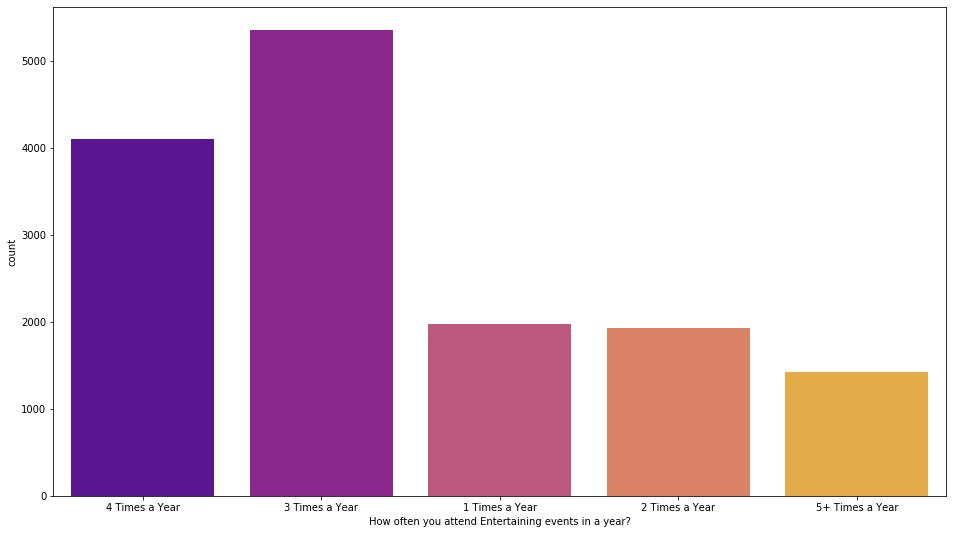

---------------------------------------------------------------------------
 Countplot for the column How many hours are you willing to travel to attend an event? is shown ↓


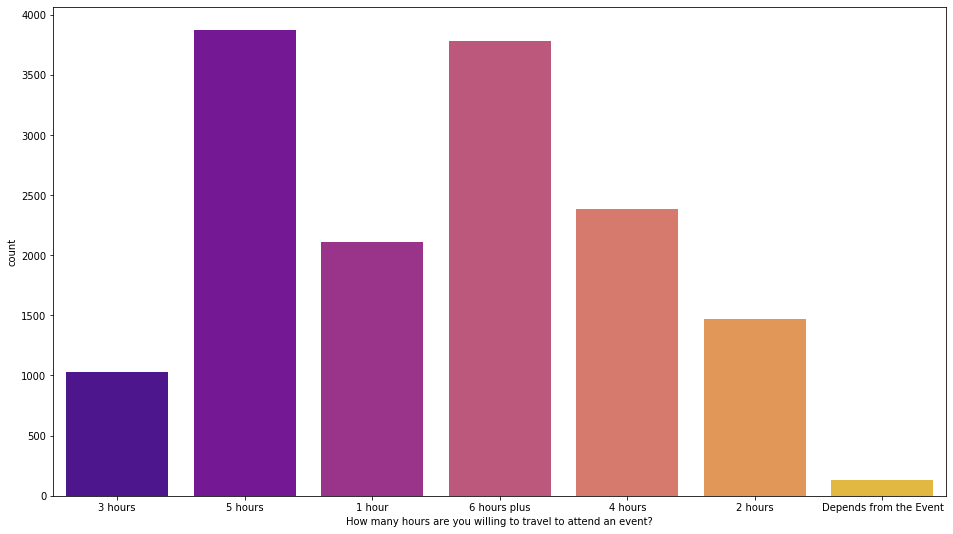

---------------------------------------------------------------------------
 Countplot for the column Are food areas, coffee areas, bars & toilets important to you? is shown ↓


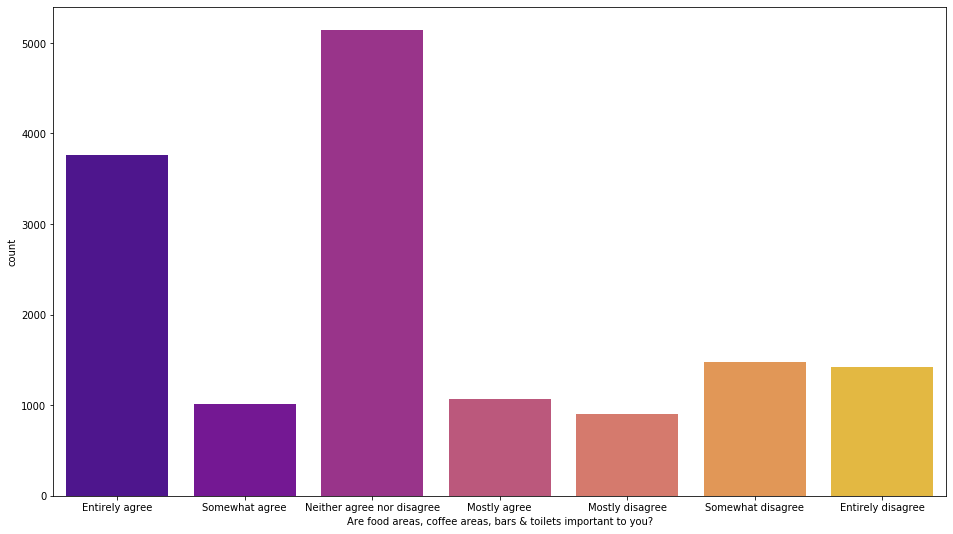

---------------------------------------------------------------------------
 Countplot for the column What is your favourite attraction from below: is shown ↓


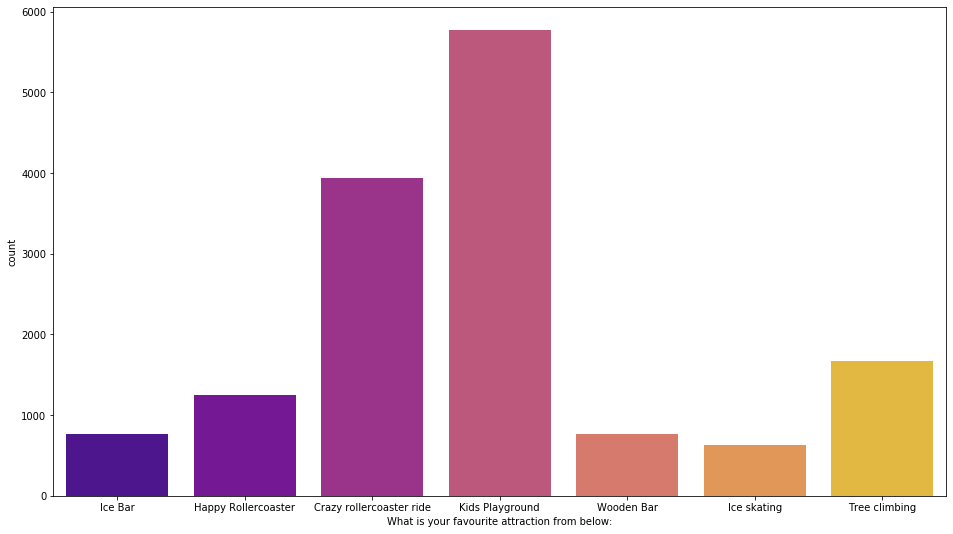

---------------------------------------------------------------------------
 Countplot for the column Were you satisfied with the last event you attended with us? is shown ↓


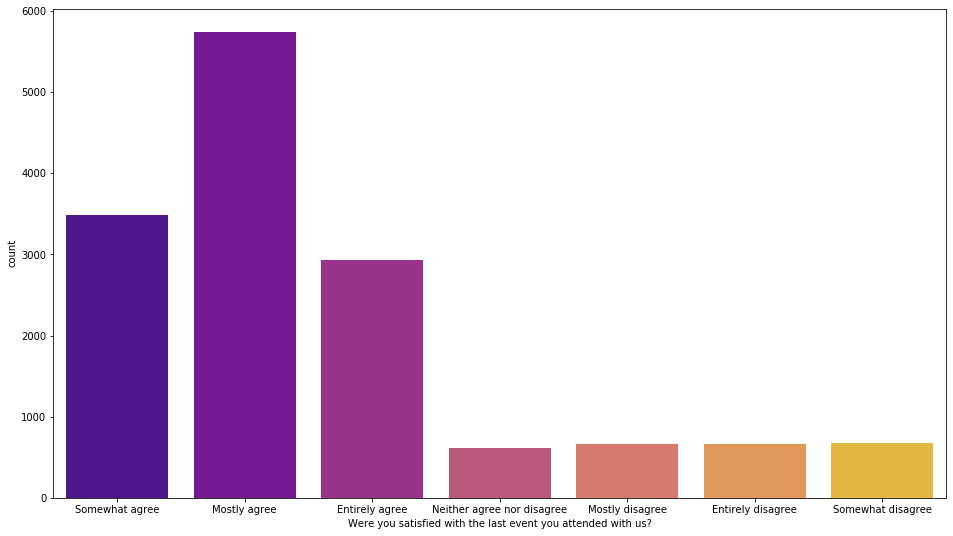

---------------------------------------------------------------------------
 Countplot for the column Would you recommend our events to other people? is shown ↓


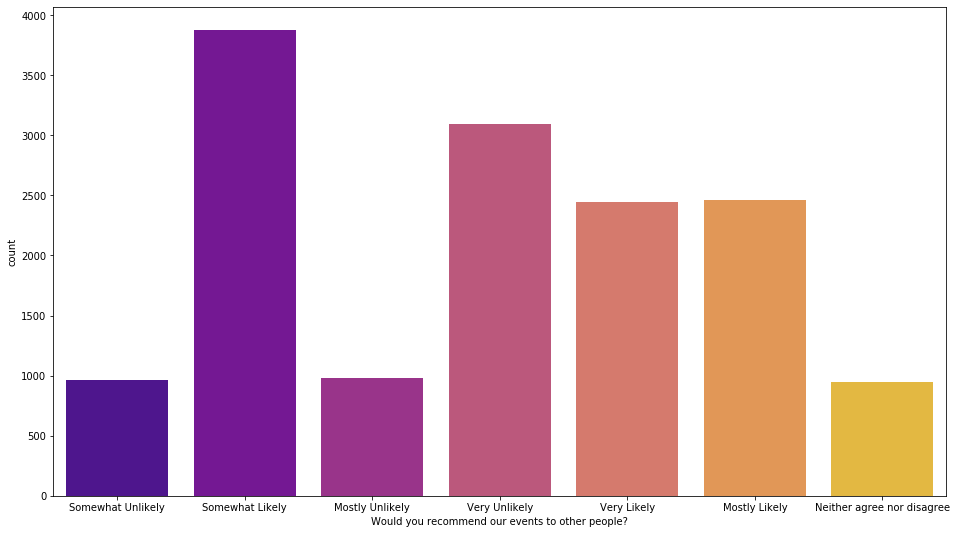

---------------------------------------------------------------------------
 Countplot for the column Did you find our events value for money? is shown ↓


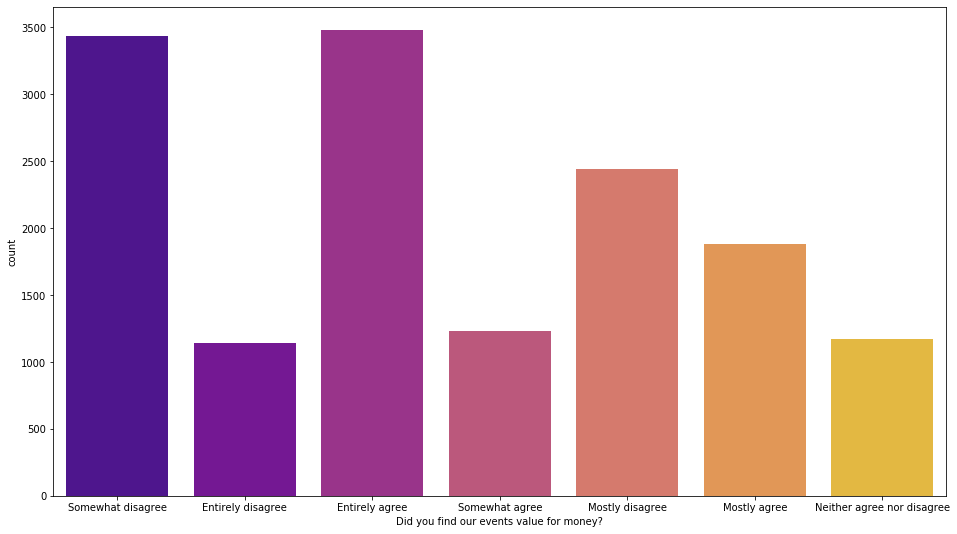

---------------------------------------------------------------------------


In [48]:
for i in events:
    print(f' Countplot for the column {i} is shown ↓')
    gecountplot(df,i)
    print("-"*75)

In [49]:
temp = df.copy()

In [50]:
temp.columns

Index(['Age', 'Gender', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?'],
      dtype='object')

**From this countplot we can observe that 1 Times a Year and 2 times a year is almost same so we can combine them and say that the people attend events less than 2 years and 4 times and 5+ times also i can combine and i can group them into one cluster and i can say that the people attend events more than or equal to 4 years,so in this way we can make small small optimisations and achieve a good result/insights!**

In [51]:
df['How often you attend Entertaining events in a year?'].unique()

array(['4 Times a Year', '3 Times a Year', '1 Times a Year',
       '2 Times a Year', '5+ Times a Year'], dtype=object)

In [52]:
temp = df.loc[df['How often you attend Entertaining events in a year?']=='2 Times a Year']
temp

Age  Gender            Current_Status Total_Household_Income  \
19       65 or older    Male     Married with children       35,000 to 49,999   
34       65 or older  Female       Living with partner     100,000 to 149,999   
46             40-49    Male       Living with partner     100,000 to 149,999   
77             26-32  Female       Living with partner       50,000 to 74,999   
93             50-59    Male     Married with children       75,000 to 99,999   
94             40-49    Male     Married with children       Less than 20,000   
97             50-59    Male     Married with children       35,000 to 49,999   
99             26-32    Male       Living with partner     100,000 to 149,999   
102            50-59    Male       Living with partner       50,000 to 74,999   
103            50-59    Male  Married without children       75,000 to 99,999   
120            50-59    Male                  Divorced        200,000 or more   
159            50-59  Female     Married with children       50,000 to 74,999   
162      65 or older    Male     Married with children       20,000 to 34,999   
233            26-32    Male       Living with partner     150,000 to 199,999   
247      65 or older    Male     Married with children       35,000 to 49,999   
248      65 or older  Female               Step parent        200,000 or more   
255            50-59    Male     Married with children       50,000 to 74,999   
256            60-64    Male  Married without children     100,000 to 149,999   
271      65 or older    Male                   Widowed     100,000 to 149,999   
272            50-59    Male  Married without children     100,000 to 149,999   
274            33-39    Male     Married with children       20,000 to 34,999   
296            40-49  Female     Married with children       75,000 to 99,999   
298            26-32  Female       Living with partner       50,000 to 74,999   
321            50-59    Male     Married with children       35,000 to 49,999   
322            50-59    Male     Married with children       50,000 to 74,999   
349            60-64    Male     Married with children       50,000 to 74,999   
358            40-49    Male       Living with partner     100,000 to 149,999   
365      65 or older    Male  Married without children     100,000 to 149,999   
370            40-49    Male       Living with partner     100,000 to 149,999   
388            50-59  Female       Living with partner     100,000 to 149,999   
401            40-49    Male       Living with partner     150,000 to 199,999   
524            60-64    Male       Living with partner     100,000 to 149,999   
554            60-64    Male     Married with children       20,000 to 34,999   
578            33-39    Male     Married with children       35,000 to 49,999   
603            33-39  Female     Married with children       20,000 to 34,999   
630            50-59  Female     Married with children       50,000 to 74,999   
632            50-59    Male     Married with children       50,000 to 74,999   
662            60-64    Male     Married with children       50,000 to 74,999   
695      65 or older    Male     Married with children       Less than 20,000   
719            40-49    Male     Married with children       50,000 to 74,999   
723            50-59    Male     Married with children       35,000 to 49,999   
729            50-59    Male     Married with children       35,000 to 49,999   
746            33-39    Male     Married with children       75,000 to 99,999   
800            40-49  Female  Married without children     100,000 to 149,999   
812      65 or older    Male     Married with children       35,000 to 49,999   
824            60-64    Male  Married without children       50,000 to 74,999   
832            50-59    Male       Living with partner     150,000 to 199,999   
877            50-59  Female       Living with partner     100,000 to 149,999   
883      65 or older    Male     Married with ch

In [53]:
temp = df.copy()

In [54]:
a = (temp['How often you attend Entertaining events in a year?']=='2 Times a Year')
b = (temp['How often you attend Entertaining events in a year?']=='1 Times a Year')
temp['How often you attend Entertaining events in a year 1 or 2 times'] = np.where(a|b,1,0)
temp.head()

Age  Gender            Current_Status Total_Household_Income  \
0  40-49  Female     Married with children       50,000 to 74,999   
1  60-64    Male     Married with children       35,000 to 49,999   
2  50-59    Male     Married with children       75,000 to 99,999   
3  50-59  Female  Married without children       35,000 to 49,999   
4  60-64    Male     Married with children     100,000 to 149,999   

  How often you attend Entertaining events in a year?  \
0                                     4 Times a Year    
1                                     3 Times a Year    
2                                     3 Times a Year    
3                                     1 Times a Year    
4                                     3 Times a Year    

                    Social_Media  \
0                   Up to 1 hour   
1                   Up to 1 hour   
2  I don't spend any time at all   
3                     Half a day   
4                   Up to 1 hour   

  How many hours are you willing to travel to attend an event?  \
0                                            3 hours             
1                                            5 hours             
2                                            5 hours             
3                                             1 hour             
4                                       6 hours plus             

  Do you enjoy adrenaline-rush activities?  \
0                        Entirely disagree   
1                        Somewhat disagree   
2                        Somewhat disagree   
3                           Entirely agree   
4                          Mostly disagree   

  Are food areas, coffee areas, bars & toilets important to you?  \
0                                     Entirely agree               
1                                     Entirely agree               
2                                     Somewhat agree               
3                         Neither agree nor disagree               
4                         Neither agree nor disagree               

  What is your favourite attraction from below:  \
0                                       Ice Bar   
1                           Happy Rollercoaster   
2                           Happy Rollercoaster   
3                      Crazy rollercoaster ride   
4                               Kids Playground   

  Were you satisfied with the last event you attended with us?  \
0                                     Somewhat agree             
1                                       Mostly agree             
2                                       Mostly agree             
3                                     Somewhat agree             
4                                     Entirely agree             

  Would you recommend our events to other people?  \
0                               Somewhat Unlikely   
1                                 Somewhat Likely   
2                                 Mostly Unlikely   
3                                 Somewhat Likely   
4                                   Very Unlikely   

  Did you find our events value for money?  \
0                        Somewhat disagree   
1                        Entirely disagree   
2                        Entirely disagree   
3                        Somewhat disagree   
4                           Entirely agree   

   How often you attend Entertaining events in a year 1 or 2 times  
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  1                
4                                                  0

In [55]:
a = (temp['How many hours are you willing to travel to attend an event?']=='4 Times a Year')
b = (temp['How many hours are you willing to travel to attend an event?']=='5+ Times a Year')

temp['How often you attend Entertaining events in a year for 4 or more years'] = np.where(a|b,1,0)

temp.head()

Age  Gender            Current_Status Total_Household_Income  \
0  40-49  Female     Married with children       50,000 to 74,999   
1  60-64    Male     Married with children       35,000 to 49,999   
2  50-59    Male     Married with children       75,000 to 99,999   
3  50-59  Female  Married without children       35,000 to 49,999   
4  60-64    Male     Married with children     100,000 to 149,999   

  How often you attend Entertaining events in a year?  \
0                                     4 Times a Year    
1                                     3 Times a Year    
2                                     3 Times a Year    
3                                     1 Times a Year    
4                                     3 Times a Year    

                    Social_Media  \
0                   Up to 1 hour   
1                   Up to 1 hour   
2  I don't spend any time at all   
3                     Half a day   
4                   Up to 1 hour   

  How many hours are you willing to travel to attend an event?  \
0                                            3 hours             
1                                            5 hours             
2                                            5 hours             
3                                             1 hour             
4                                       6 hours plus             

  Do you enjoy adrenaline-rush activities?  \
0                        Entirely disagree   
1                        Somewhat disagree   
2                        Somewhat disagree   
3                           Entirely agree   
4                          Mostly disagree   

  Are food areas, coffee areas, bars & toilets important to you?  \
0                                     Entirely agree               
1                                     Entirely agree               
2                                     Somewhat agree               
3                         Neither agree nor disagree               
4                         Neither agree nor disagree               

  What is your favourite attraction from below:  \
0                                       Ice Bar   
1                           Happy Rollercoaster   
2                           Happy Rollercoaster   
3                      Crazy rollercoaster ride   
4                               Kids Playground   

  Were you satisfied with the last event you attended with us?  \
0                                     Somewhat agree             
1                                       Mostly agree             
2                                       Mostly agree             
3                                     Somewhat agree             
4                                     Entirely agree             

  Would you recommend our events to other people?  \
0                               Somewhat Unlikely   
1                                 Somewhat Likely   
2                                 Mostly Unlikely   
3                                 Somewhat Likely   
4                                   Very Unlikely   

  Did you find our events value for money?  \
0                        Somewhat disagree   
1                        Entirely disagree   
2                        Entirely disagree   
3                        Somewhat disagree   
4                           Entirely agree   

   How often you attend Entertaining events in a year 1 or 2 times  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  1                 
4                                                  0                 

   How often you attend Entertaining events in a year for 4 or more years  
0                                                  0                       
1                                                  0                      

In [56]:
pd.set_option('display.max_columns',None)
df1 = pd.read_csv('Events_Cluster_Output.csv')
df1.head()

Unnamed: 0  customer    age  gender postcode         district  \
0           0         1  40-49  Female  AL9 7BN  Welwyn Hatfield   
1           1         2  60-64    Male  AL7 1ZW  Welwyn Hatfield   
2           2         3  50-59    Male  AB4 5JX    Aberdeenshire   
3           3         4  50-59  Female  B24 0DL       Birmingham   
4           4         5  60-64    Male  E17 5QP   Waltham Forest   

            constituency   latitude  longitude            current_status  \
0        Welwyn Hatfield  51.727429  -0.183648     Married with children   
1        Welwyn Hatfield  51.804482  -0.195898     Married with children   
2       Banff and Buchan  57.692200  -2.022295     Married with children   
3  Birmingham, Erdington  52.526595  -1.822211  Married without children   
4            Walthamstow  51.593979  -0.040803     Married with children   

  total_household_income how_often_you_attend_entertaining_events_in_a_year  \
0       50,000 to 74,999                                     4 Times a Year   
1       35,000 to 49,999                                     3 Times a Year   
2       75,000 to 99,999                                     3 Times a Year   
3       35,000 to 49,999                                     1 Times a Year   
4     100,000 to 149,999                                     3 Times a Year   

                   social_media  \
0                  Up to 1 hour   
1                  Up to 1 hour   
2  I dont spend any time at all   
3                    Half a day   
4                  Up to 1 hour   

  how_many_hours_are_you_willing_to_travel_to_attend_an_event  \
0                                            3 hours            
1                                            5 hours            
2                                            5 hours            
3                                             1 hour            
4                                       6 hours plus            

  do_you_enjoy_adrenaline_rush_activities  \
0                       Entirely disagree   
1                       Somewhat disagree   
2                       Somewhat disagree   
3                          Entirely agree   
4                         Mostly disagree   

  are_food_areas_coffee_areas_bars_toilets_important_to_you  \
0                                     Entirely agree          
1                                     Entirely agree          
2                                     Somewhat agree          
3                         Neither agree nor disagree          
4                         Neither agree nor disagree          

  what_is_your_favourite_attraction_from_below  \
0                                      Ice Bar   
1                          Happy Rollercoaster   
2                          Happy Rollercoaster   
3                     Crazy rollercoaster ride   
4                              Kids Playground   

  were_you_satisfied_with_the_last_event_you_attended_with_us  \
0                                     Somewhat agree            
1                                       Mostly agree            
2                                       Mostly agree            
3                                     Somewhat agree            
4                                     Entirely agree            

  would_you_recommend_our_events_to_other_people  \
0                              Somewhat Unlikely   
1                                Somewhat Likely   
2                                Mostly Unlikely   
3                                Somewhat Likely   
4                                  Very Unlikely   

  did_you_find_our_events_value_for_money  Event Lat  Event Lon  \
0                       Somewhat disagree    51.5073     0.1657   
1                       Entirely disagree    51.5073     0.1657   
2                       Entirely disagree    51.5073     0.1657   
3                       Somewhat disagree    51.5073     0.1657   
4                          Entirely agree    51.5073     0.1657   

  

In [57]:
df.head()

Age  Gender            Current_Status Total_Household_Income  \
0  40-49  Female     Married with children       50,000 to 74,999   
1  60-64    Male     Married with children       35,000 to 49,999   
2  50-59    Male     Married with children       75,000 to 99,999   
3  50-59  Female  Married without children       35,000 to 49,999   
4  60-64    Male     Married with children     100,000 to 149,999   

  How often you attend Entertaining events in a year?  \
0                                     4 Times a Year    
1                                     3 Times a Year    
2                                     3 Times a Year    
3                                     1 Times a Year    
4                                     3 Times a Year    

                    Social_Media  \
0                   Up to 1 hour   
1                   Up to 1 hour   
2  I don't spend any time at all   
3                     Half a day   
4                   Up to 1 hour   

  How many hours are you willing to travel to attend an event?  \
0                                            3 hours             
1                                            5 hours             
2                                            5 hours             
3                                             1 hour             
4                                       6 hours plus             

  Do you enjoy adrenaline-rush activities?  \
0                        Entirely disagree   
1                        Somewhat disagree   
2                        Somewhat disagree   
3                           Entirely agree   
4                          Mostly disagree   

  Are food areas, coffee areas, bars & toilets important to you?  \
0                                     Entirely agree               
1                                     Entirely agree               
2                                     Somewhat agree               
3                         Neither agree nor disagree               
4                         Neither agree nor disagree               

  What is your favourite attraction from below:  \
0                                       Ice Bar   
1                           Happy Rollercoaster   
2                           Happy Rollercoaster   
3                      Crazy rollercoaster ride   
4                               Kids Playground   

  Were you satisfied with the last event you attended with us?  \
0                                     Somewhat agree             
1                                       Mostly agree             
2                                       Mostly agree             
3                                     Somewhat agree             
4                                     Entirely agree             

  Would you recommend our events to other people?  \
0                               Somewhat Unlikely   
1                                 Somewhat Likely   
2                                 Mostly Unlikely   
3                                 Somewhat Likely   
4                                   Very Unlikely   

  Did you find our events value for money?  
0                        Somewhat disagree  
1                        Entirely disagree  
2                        Entirely disagree  
3                        Somewhat disagree  
4                           Entirely agree

In [58]:
len(df['Total_Household_Income'].unique())

8

In [59]:
df['Total_Household_Income'].unique()

array(['50,000 to 74,999', '35,000 to 49,999', '75,000 to 99,999',
       '100,000 to 149,999', '150,000 to 199,999', '200,000 or more',
       '20,000 to 34,999', 'Less than 20,000'], dtype=object)

## Actual Export and Check

In [60]:
'''

After finding the number of components which is giving you 
53% of the variance,your task is to fit the model which PCA returend
which is the "x_r" to the kmeans clustering inorder to get the 
inertia and the clusters,as shown ↓,the main reason why we use 
PCA in case of algo's like Kmeans and SVM is they all are based 
on distance and geometry,if the datapoints are less scattered and are
close with each other,they will be in a cluster and teh prediction could
be made quicker as the distance between 2 points is in a scale!,so always
decomposition/scaling is must in case you're using Kmeans/SVM/linearmodels!


'''


pca = PCA(n_components=53,random_state=453)

x_r = pca.fit(x).transform(x)

kmeans = KMeans(n_clusters=5,random_state=2)

kmeans = kmeans.fit(x_r)

labels = kmeans.labels_

labels_set = list(set(labels))

labels_dict = Counter(labels)

labels_set,labels_dict

([0, 1, 2, 3, 4], Counter({1: 8488, 0: 1865, 3: 2209, 2: 1228, 4: 988}))

In [61]:
df['Predicted_cluster'] = labels

df.head()

Age  Gender            Current_Status Total_Household_Income  \
0  40-49  Female     Married with children       50,000 to 74,999   
1  60-64    Male     Married with children       35,000 to 49,999   
2  50-59    Male     Married with children       75,000 to 99,999   
3  50-59  Female  Married without children       35,000 to 49,999   
4  60-64    Male     Married with children     100,000 to 149,999   

  How often you attend Entertaining events in a year?  \
0                                     4 Times a Year    
1                                     3 Times a Year    
2                                     3 Times a Year    
3                                     1 Times a Year    
4                                     3 Times a Year    

                    Social_Media  \
0                   Up to 1 hour   
1                   Up to 1 hour   
2  I don't spend any time at all   
3                     Half a day   
4                   Up to 1 hour   

  How many hours are you willing to travel to attend an event?  \
0                                            3 hours             
1                                            5 hours             
2                                            5 hours             
3                                             1 hour             
4                                       6 hours plus             

  Do you enjoy adrenaline-rush activities?  \
0                        Entirely disagree   
1                        Somewhat disagree   
2                        Somewhat disagree   
3                           Entirely agree   
4                          Mostly disagree   

  Are food areas, coffee areas, bars & toilets important to you?  \
0                                     Entirely agree               
1                                     Entirely agree               
2                                     Somewhat agree               
3                         Neither agree nor disagree               
4                         Neither agree nor disagree               

  What is your favourite attraction from below:  \
0                                       Ice Bar   
1                           Happy Rollercoaster   
2                           Happy Rollercoaster   
3                      Crazy rollercoaster ride   
4                               Kids Playground   

  Were you satisfied with the last event you attended with us?  \
0                                     Somewhat agree             
1                                       Mostly agree             
2                                       Mostly agree             
3                                     Somewhat agree             
4                                     Entirely agree             

  Would you recommend our events to other people?  \
0                               Somewhat Unlikely   
1                                 Somewhat Likely   
2                                 Mostly Unlikely   
3                                 Somewhat Likely   
4                                   Very Unlikely   

  Did you find our events value for money?  Predicted_cluster  
0                        Somewhat disagree                  1  
1                        Entirely disagree                  1  
2                        Entirely disagree                  1  
3                        Somewhat disagree                  0  
4                           Entirely agree                  3

In [62]:
df['Cluster_name'] = 0

df['Cluster_name'].loc[df['Predicted_cluster']==0]='Cluster1'
df['Cluster_name'].loc[df['Predicted_cluster']==1] = 'Cluster2'
df['Cluster_name'].loc[df['Predicted_cluster']==2] = 'Cluster3'
df['Cluster_name'].loc[df['Predicted_cluster']==3] = 'Cluster4'
df['Cluster_name'].loc[df['Predicted_cluster']==4] = 'Cluster5'

df.head()

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Age  Gender            Current_Status Total_Household_Income  \
0  40-49  Female     Married with children       50,000 to 74,999   
1  60-64    Male     Married with children       35,000 to 49,999   
2  50-59    Male     Married with children       75,000 to 99,999   
3  50-59  Female  Married without children       35,000 to 49,999   
4  60-64    Male     Married with children     100,000 to 149,999   

  How often you attend Entertaining events in a year?  \
0                                     4 Times a Year    
1                                     3 Times a Year    
2                                     3 Times a Year    
3                                     1 Times a Year    
4                                     3 Times a Year    

                    Social_Media  \
0                   Up to 1 hour   
1                   Up to 1 hour   
2  I don't spend any time at all   
3                     Half a day   
4                   Up to 1 hour   

  How many hours are you willing to travel to attend an event?  \
0                                            3 hours             
1                                            5 hours             
2                                            5 hours             
3                                             1 hour             
4                                       6 hours plus             

  Do you enjoy adrenaline-rush activities?  \
0                        Entirely disagree   
1                        Somewhat disagree   
2                        Somewhat disagree   
3                           Entirely agree   
4                          Mostly disagree   

  Are food areas, coffee areas, bars & toilets important to you?  \
0                                     Entirely agree               
1                                     Entirely agree               
2                                     Somewhat agree               
3                         Neither agree nor disagree               
4                         Neither agree nor disagree               

  What is your favourite attraction from below:  \
0                                       Ice Bar   
1                           Happy Rollercoaster   
2                           Happy Rollercoaster   
3                      Crazy rollercoaster ride   
4                               Kids Playground   

  Were you satisfied with the last event you attended with us?  \
0                                     Somewhat agree             
1                                       Mostly agree             
2                                       Mostly agree             
3                                     Somewhat agree             
4                                     Entirely agree             

  Would you recommend our events to other people?  \
0                               Somewhat Unlikely   
1                                 Somewhat Likely   
2                                 Mostly Unlikely   
3                                 Somewhat Likely   
4                                   Very Unlikely   

  Did you find our events value for money?  Predicted_cluster Cluster_name  
0                        Somewhat disagree                  1     Cluster2  
1                        Entirely disagree                  1     Cluster2  
2                        Entirely disagree                  1     Cluster2  
3                        Somewhat disagree                  0     Cluster1  
4                           Entirely agree                  3     Cluster4

In [63]:
df.columns

Index(['Age', 'Gender', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?', 'Predicted_cluster',
       'Cluster_name'],
      dtype='object')

In [64]:
df.head()

Age  Gender            Current_Status Total_Household_Income  \
0  40-49  Female     Married with children       50,000 to 74,999   
1  60-64    Male     Married with children       35,000 to 49,999   
2  50-59    Male     Married with children       75,000 to 99,999   
3  50-59  Female  Married without children       35,000 to 49,999   
4  60-64    Male     Married with children     100,000 to 149,999   

  How often you attend Entertaining events in a year?  \
0                                     4 Times a Year    
1                                     3 Times a Year    
2                                     3 Times a Year    
3                                     1 Times a Year    
4                                     3 Times a Year    

                    Social_Media  \
0                   Up to 1 hour   
1                   Up to 1 hour   
2  I don't spend any time at all   
3                     Half a day   
4                   Up to 1 hour   

  How many hours are you willing to travel to attend an event?  \
0                                            3 hours             
1                                            5 hours             
2                                            5 hours             
3                                             1 hour             
4                                       6 hours plus             

  Do you enjoy adrenaline-rush activities?  \
0                        Entirely disagree   
1                        Somewhat disagree   
2                        Somewhat disagree   
3                           Entirely agree   
4                          Mostly disagree   

  Are food areas, coffee areas, bars & toilets important to you?  \
0                                     Entirely agree               
1                                     Entirely agree               
2                                     Somewhat agree               
3                         Neither agree nor disagree               
4                         Neither agree nor disagree               

  What is your favourite attraction from below:  \
0                                       Ice Bar   
1                           Happy Rollercoaster   
2                           Happy Rollercoaster   
3                      Crazy rollercoaster ride   
4                               Kids Playground   

  Were you satisfied with the last event you attended with us?  \
0                                     Somewhat agree             
1                                       Mostly agree             
2                                       Mostly agree             
3                                     Somewhat agree             
4                                     Entirely agree             

  Would you recommend our events to other people?  \
0                               Somewhat Unlikely   
1                                 Somewhat Likely   
2                                 Mostly Unlikely   
3                                 Somewhat Likely   
4                                   Very Unlikely   

  Did you find our events value for money?  Predicted_cluster Cluster_name  
0                        Somewhat disagree                  1     Cluster2  
1                        Entirely disagree                  1     Cluster2  
2                        Entirely disagree                  1     Cluster2  
3                        Somewhat disagree                  0     Cluster1  
4                           Entirely agree                  3     Cluster4

In [65]:
catvars = df.select_dtypes(['object']).columns

catvars = catvars[:-1]

catvars

Index(['Age', 'Gender', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?'],
      dtype='object')

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
temp = df.copy()

In [68]:
le = LabelEncoder()

In [69]:
for i in catvars:
    temp[i] = le.fit_transform(temp[i])

temp.head()

Age  Gender  Current_Status  Total_Household_Income  \
0    5       0               2                       5   
1    7       1               2                       4   
2    6       1               2                       6   
3    6       0               3                       4   
4    7       1               2                       0   

   How often you attend Entertaining events in a year?  Social_Media  \
0                                                  3               3   
1                                                  2               3   
2                                                  2               1   
3                                                  0               0   
4                                                  2               3   

   How many hours are you willing to travel to attend an event?  \
0                                                  2              
1                                                  4              
2                                                  4              
3                                                  0              
4                                                  5              

   Do you enjoy adrenaline-rush activities?  \
0                                         1   
1                                         6   
2                                         6   
3                                         0   
4                                         3   

   Are food areas, coffee areas, bars & toilets important to you?  \
0                                                  0                
1                                                  0                
2                                                  5                
3                                                  4                
4                                                  4                

   What is your favourite attraction from below:  \
0                                              2   
1                                              1   
2                                              1   
3                                              0   
4                                              4   

   Were you satisfied with the last event you attended with us?  \
0                                                  5              
1                                                  2              
2                                                  2              
3                                                  5              
4                                                  0              

   Would you recommend our events to other people?  \
0                                                4   
1                                                3   
2                                                1   
3                                                3   
4                                                6   

   Did you find our events value for money?  Predicted_cluster Cluster_name  
0                                         6                  1     Cluster2  
1                                         1                  1     Cluster2  
2                                         1                  1     Cluster2  
3                                         6                  0     Cluster1  
4                                         0                  3     Cluster4

In [70]:
temp1 = df.copy()

In [71]:
temp1.head(2)

Age  Gender         Current_Status Total_Household_Income  \
0  40-49  Female  Married with children       50,000 to 74,999   
1  60-64    Male  Married with children       35,000 to 49,999   

  How often you attend Entertaining events in a year?  Social_Media  \
0                                     4 Times a Year   Up to 1 hour   
1                                     3 Times a Year   Up to 1 hour   

  How many hours are you willing to travel to attend an event?  \
0                                            3 hours             
1                                            5 hours             

  Do you enjoy adrenaline-rush activities?  \
0                        Entirely disagree   
1                        Somewhat disagree   

  Are food areas, coffee areas, bars & toilets important to you?  \
0                                     Entirely agree               
1                                     Entirely agree               

  What is your favourite attraction from below:  \
0                                       Ice Bar   
1                           Happy Rollercoaster   

  Were you satisfied with the last event you attended with us?  \
0                                     Somewhat agree             
1                                       Mostly agree             

  Would you recommend our events to other people?  \
0                               Somewhat Unlikely   
1                                 Somewhat Likely   

  Did you find our events value for money?  Predicted_cluster Cluster_name  
0                        Somewhat disagree                  1     Cluster2  
1                        Entirely disagree                  1     Cluster2

In [72]:
unique(df)

 Col Age has ['40-49' '60-64' '50-59' '65 or older' '33-39' '26-32' '21-25'
 '17 or younger' '18-20']
 Col Gender has ['Female' 'Male']
 Col Current_Status has ['Married with children' 'Married without children' 'Living with partner'
 'Divorced' 'Single, never married' 'Separated' 'Widowed' 'Step parent']
 Col Total_Household_Income has ['50,000 to 74,999' '35,000 to 49,999' '75,000 to 99,999'
 '100,000 to 149,999' '150,000 to 199,999' '200,000 or more'
 '20,000 to 34,999' 'Less than 20,000']
 Col How often you attend Entertaining events in a year? has ['4 Times a Year' '3 Times a Year' '1 Times a Year' '2 Times a Year'
 '5+ Times a Year']
 Col Social_Media has ['Up to 1 hour' "I don't spend any time at all" 'Half a day'
 'Up to 2 hours' 'More than half a day']
 Col How many hours are you willing to travel to attend an event? has ['3 hours' '5 hours' '1 hour' '6 hours plus' '4 hours' '2 hours'
 'Depends from the Event']
 Col Do you enjoy adrenaline-rush activities? has ['Entirely disag

In [73]:
def catvarsunique(i):
    print(df[i].unique())
    
    print("="*75)

In [74]:
for i in catvars:
    catvarsunique(i)
    print("-"*75)

['40-49' '60-64' '50-59' '65 or older' '33-39' '26-32' '21-25'
 '17 or younger' '18-20']
---------------------------------------------------------------------------
['Female' 'Male']
---------------------------------------------------------------------------
['Married with children' 'Married without children' 'Living with partner'
 'Divorced' 'Single, never married' 'Separated' 'Widowed' 'Step parent']
---------------------------------------------------------------------------
['50,000 to 74,999' '35,000 to 49,999' '75,000 to 99,999'
 '100,000 to 149,999' '150,000 to 199,999' '200,000 or more'
 '20,000 to 34,999' 'Less than 20,000']
---------------------------------------------------------------------------
['4 Times a Year' '3 Times a Year' '1 Times a Year' '2 Times a Year'
 '5+ Times a Year']
---------------------------------------------------------------------------
['Up to 1 hour' "I don't spend any time at all" 'Half a day'
 'Up to 2 hours' 'More than half a day']
----------------

In [75]:
df.head()

Age  Gender            Current_Status Total_Household_Income  \
0  40-49  Female     Married with children       50,000 to 74,999   
1  60-64    Male     Married with children       35,000 to 49,999   
2  50-59    Male     Married with children       75,000 to 99,999   
3  50-59  Female  Married without children       35,000 to 49,999   
4  60-64    Male     Married with children     100,000 to 149,999   

  How often you attend Entertaining events in a year?  \
0                                     4 Times a Year    
1                                     3 Times a Year    
2                                     3 Times a Year    
3                                     1 Times a Year    
4                                     3 Times a Year    

                    Social_Media  \
0                   Up to 1 hour   
1                   Up to 1 hour   
2  I don't spend any time at all   
3                     Half a day   
4                   Up to 1 hour   

  How many hours are you willing to travel to attend an event?  \
0                                            3 hours             
1                                            5 hours             
2                                            5 hours             
3                                             1 hour             
4                                       6 hours plus             

  Do you enjoy adrenaline-rush activities?  \
0                        Entirely disagree   
1                        Somewhat disagree   
2                        Somewhat disagree   
3                           Entirely agree   
4                          Mostly disagree   

  Are food areas, coffee areas, bars & toilets important to you?  \
0                                     Entirely agree               
1                                     Entirely agree               
2                                     Somewhat agree               
3                         Neither agree nor disagree               
4                         Neither agree nor disagree               

  What is your favourite attraction from below:  \
0                                       Ice Bar   
1                           Happy Rollercoaster   
2                           Happy Rollercoaster   
3                      Crazy rollercoaster ride   
4                               Kids Playground   

  Were you satisfied with the last event you attended with us?  \
0                                     Somewhat agree             
1                                       Mostly agree             
2                                       Mostly agree             
3                                     Somewhat agree             
4                                     Entirely agree             

  Would you recommend our events to other people?  \
0                               Somewhat Unlikely   
1                                 Somewhat Likely   
2                                 Mostly Unlikely   
3                                 Somewhat Likely   
4                                   Very Unlikely   

  Did you find our events value for money?  Predicted_cluster Cluster_name  
0                        Somewhat disagree                  1     Cluster2  
1                        Entirely disagree                  1     Cluster2  
2                        Entirely disagree                  1     Cluster2  
3                        Somewhat disagree                  0     Cluster1  
4                           Entirely agree                  3     Cluster4

In [76]:
output = pd.read_csv('Events_Cluster_Output.csv')
output.head()

Unnamed: 0  customer    age  gender postcode         district  \
0           0         1  40-49  Female  AL9 7BN  Welwyn Hatfield   
1           1         2  60-64    Male  AL7 1ZW  Welwyn Hatfield   
2           2         3  50-59    Male  AB4 5JX    Aberdeenshire   
3           3         4  50-59  Female  B24 0DL       Birmingham   
4           4         5  60-64    Male  E17 5QP   Waltham Forest   

            constituency   latitude  longitude            current_status  \
0        Welwyn Hatfield  51.727429  -0.183648     Married with children   
1        Welwyn Hatfield  51.804482  -0.195898     Married with children   
2       Banff and Buchan  57.692200  -2.022295     Married with children   
3  Birmingham, Erdington  52.526595  -1.822211  Married without children   
4            Walthamstow  51.593979  -0.040803     Married with children   

  total_household_income how_often_you_attend_entertaining_events_in_a_year  \
0       50,000 to 74,999                                     4 Times a Year   
1       35,000 to 49,999                                     3 Times a Year   
2       75,000 to 99,999                                     3 Times a Year   
3       35,000 to 49,999                                     1 Times a Year   
4     100,000 to 149,999                                     3 Times a Year   

                   social_media  \
0                  Up to 1 hour   
1                  Up to 1 hour   
2  I dont spend any time at all   
3                    Half a day   
4                  Up to 1 hour   

  how_many_hours_are_you_willing_to_travel_to_attend_an_event  \
0                                            3 hours            
1                                            5 hours            
2                                            5 hours            
3                                             1 hour            
4                                       6 hours plus            

  do_you_enjoy_adrenaline_rush_activities  \
0                       Entirely disagree   
1                       Somewhat disagree   
2                       Somewhat disagree   
3                          Entirely agree   
4                         Mostly disagree   

  are_food_areas_coffee_areas_bars_toilets_important_to_you  \
0                                     Entirely agree          
1                                     Entirely agree          
2                                     Somewhat agree          
3                         Neither agree nor disagree          
4                         Neither agree nor disagree          

  what_is_your_favourite_attraction_from_below  \
0                                      Ice Bar   
1                          Happy Rollercoaster   
2                          Happy Rollercoaster   
3                     Crazy rollercoaster ride   
4                              Kids Playground   

  were_you_satisfied_with_the_last_event_you_attended_with_us  \
0                                     Somewhat agree            
1                                       Mostly agree            
2                                       Mostly agree            
3                                     Somewhat agree            
4                                     Entirely agree            

  would_you_recommend_our_events_to_other_people  \
0                              Somewhat Unlikely   
1                                Somewhat Likely   
2                                Mostly Unlikely   
3                                Somewhat Likely   
4                                  Very Unlikely   

  did_you_find_our_events_value_for_money  Event Lat  Event Lon  \
0                       Somewhat disagree    51.5073     0.1657   
1                       Entirely disagree    51.5073     0.1657   
2                       Entirely disagree    51.5073     0.1657   
3                       Somewhat disagree    51.5073     0.1657   
4                          Entirely agree    51.5073     0.1657   

  

In [77]:
output.columns

Index(['Unnamed: 0', 'customer', 'age', 'gender', 'postcode', 'district',
       'constituency', 'latitude', 'longitude', 'current_status',
       'total_household_income',
       'how_often_you_attend_entertaining_events_in_a_year', 'social_media',
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event',
       'do_you_enjoy_adrenaline_rush_activities',
       'are_food_areas_coffee_areas_bars_toilets_important_to_you',
       'what_is_your_favourite_attraction_from_below',
       'were_you_satisfied_with_the_last_event_you_attended_with_us',
       'would_you_recommend_our_events_to_other_people',
       'did_you_find_our_events_value_for_money', 'Event Lat', 'Event Lon',
       'Distance from Event', 'Clusters', 'Clusters Category',
       'Household Income Order', 'Social Media Time Spend Order',
       'food_areas_coffee_areas_bars_toilets Agree Order',
       'enjoy_adrenaline_rush_activities Agree Order', 'Satisfied Agree Order',
       'Value_for_money Agree Order'

In [78]:
df.columns

Index(['Age', 'Gender', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?', 'Predicted_cluster',
       'Cluster_name'],
      dtype='object')

## Mapping the Categorical Values with Numerical Numbers inorder to get the Map

In [ ]:
used_cols = ['Household Income Order', 'Social Media Time Spend Order',
       'food_areas_coffee_areas_bars_toilets Agree Order',
       'enjoy_adrenaline_rush_activities Agree Order', 'Satisfied Agree Order',
       'Value_for_money Agree Order', 'Recommend Order']


In [79]:
to_use = ['Total_Household_Income','Social_Media','Are food areas, coffee areas, bars & toilets important to you?',
         'Do you enjoy adrenaline-rush activities?','Did you find our events value for money?','Would you recommend our events to other people?',
         'Were you satisfied with the last event you attended with us?']


In [80]:
def unique(i):
    return df[i].unique()


total_list = []
for i in to_use:
    subset = []
    subset.append(unique(i))
    
    total_list.append(subset)
    
    
total_list

[[array(['50,000 to 74,999', '35,000 to 49,999', '75,000 to 99,999',
         '100,000 to 149,999', '150,000 to 199,999', '200,000 or more',
         '20,000 to 34,999', 'Less than 20,000'], dtype=object)],
 [array(['Up to 1 hour', "I don't spend any time at all", 'Half a day',
         'Up to 2 hours', 'More than half a day'], dtype=object)],
 [array(['Entirely agree', 'Somewhat agree', 'Neither agree nor disagree',
         'Mostly agree', 'Mostly disagree', 'Somewhat disagree',
         'Entirely disagree'], dtype=object)],
 [array(['Entirely disagree', 'Somewhat disagree', 'Entirely agree',
         'Mostly disagree', 'Neither agree nor disagree', 'Somewhat agree',
         'Mostly agree'], dtype=object)],
 [array(['Somewhat disagree', 'Entirely disagree', 'Entirely agree',
         'Somewhat agree', 'Mostly disagree', 'Mostly agree',
         'Neither agree nor disagree'], dtype=object)],
 [array(['Somewhat Unlikely', 'Somewhat Likely', 'Mostly Unlikely',
         'Very Unlikely',

In [81]:
list_mapped = dict(list(zip(to_use,total_list)))
list_mapped

{'Total_Household_Income': [array(['50,000 to 74,999', '35,000 to 49,999', '75,000 to 99,999',
         '100,000 to 149,999', '150,000 to 199,999', '200,000 or more',
         '20,000 to 34,999', 'Less than 20,000'], dtype=object)],
 'Social_Media': [array(['Up to 1 hour', "I don't spend any time at all", 'Half a day',
         'Up to 2 hours', 'More than half a day'], dtype=object)],
 'Are food areas, coffee areas, bars & toilets important to you?': [array(['Entirely agree', 'Somewhat agree', 'Neither agree nor disagree',
         'Mostly agree', 'Mostly disagree', 'Somewhat disagree',
         'Entirely disagree'], dtype=object)],
 'Do you enjoy adrenaline-rush activities?': [array(['Entirely disagree', 'Somewhat disagree', 'Entirely agree',
         'Mostly disagree', 'Neither agree nor disagree', 'Somewhat agree',
         'Mostly agree'], dtype=object)],
 'Did you find our events value for money?': [array(['Somewhat disagree', 'Entirely disagree', 'Entirely agree',
         'Somew

In [99]:
total_list[5][0]

array(['Somewhat Unlikely', 'Somewhat Likely', 'Mostly Unlikely',
       'Very Unlikely', 'Very Likely', 'Mostly Likely',
       'Neither agree nor disagree'], dtype=object)

In [94]:
len(total_list[0][0])

8

In [124]:
def getmapper(value):
    maps = {j:i for i,j in enumerate(total_list[value][0])}
    
    return maps


In [125]:
all_maps = []
for i in range(0,len(total_list)):
    subset = []
    
    subset.append(getmapper(i))
    
    all_maps.append(subset)
    
    
all_maps

[[{'50,000 to 74,999': 0,
   '35,000 to 49,999': 1,
   '75,000 to 99,999': 2,
   '100,000 to 149,999': 3,
   '150,000 to 199,999': 4,
   '200,000 or more': 5,
   '20,000 to 34,999': 6,
   'Less than 20,000': 7}],
 [{'Up to 1 hour': 0,
   "I don't spend any time at all": 1,
   'Half a day': 2,
   'Up to 2 hours': 3,
   'More than half a day': 4}],
 [{'Entirely agree': 0,
   'Somewhat agree': 1,
   'Neither agree nor disagree': 2,
   'Mostly agree': 3,
   'Mostly disagree': 4,
   'Somewhat disagree': 5,
   'Entirely disagree': 6}],
 [{'Entirely disagree': 0,
   'Somewhat disagree': 1,
   'Entirely agree': 2,
   'Mostly disagree': 3,
   'Neither agree nor disagree': 4,
   'Somewhat agree': 5,
   'Mostly agree': 6}],
 [{'Somewhat disagree': 0,
   'Entirely disagree': 1,
   'Entirely agree': 2,
   'Somewhat agree': 3,
   'Mostly disagree': 4,
   'Mostly agree': 5,
   'Neither agree nor disagree': 6}],
 [{'Somewhat Unlikely': 0,
   'Somewhat Likely': 1,
   'Mostly Unlikely': 2,
   'Very Unli

In [126]:
all_maps[0][0]

{'50,000 to 74,999': 0,
 '35,000 to 49,999': 1,
 '75,000 to 99,999': 2,
 '100,000 to 149,999': 3,
 '150,000 to 199,999': 4,
 '200,000 or more': 5,
 '20,000 to 34,999': 6,
 'Less than 20,000': 7}

In [127]:
df.head(3)

Age  Gender         Current_Status Total_Household_Income  \
0  40-49  Female  Married with children       50,000 to 74,999   
1  60-64    Male  Married with children       35,000 to 49,999   
2  50-59    Male  Married with children       75,000 to 99,999   

  How often you attend Entertaining events in a year?  \
0                                     4 Times a Year    
1                                     3 Times a Year    
2                                     3 Times a Year    

                    Social_Media  \
0                   Up to 1 hour   
1                   Up to 1 hour   
2  I don't spend any time at all   

  How many hours are you willing to travel to attend an event?  \
0                                            3 hours             
1                                            5 hours             
2                                            5 hours             

  Do you enjoy adrenaline-rush activities?  \
0                        Entirely disagree   
1                        Somewhat disagree   
2                        Somewhat disagree   

  Are food areas, coffee areas, bars & toilets important to you?  \
0                                     Entirely agree               
1                                     Entirely agree               
2                                     Somewhat agree               

  What is your favourite attraction from below:  \
0                                       Ice Bar   
1                           Happy Rollercoaster   
2                           Happy Rollercoaster   

  Were you satisfied with the last event you attended with us?  \
0                                     Somewhat agree             
1                                       Mostly agree             
2                                       Mostly agree             

  Would you recommend our events to other people?  \
0                               Somewhat Unlikely   
1                                 Somewhat Likely   
2                                 Mostly Unlikely   

  Did you find our events value for money?  Predicted_cluster Cluster_name  \
0                        Somewhat disagree                  1     Cluster2   
1                        Entirely disagree                  1     Cluster2   
2                        Entirely disagree                  1     Cluster2   

  Household Income Order Social Media Time Spend Order  \
0                    NaN                           NaN   
1                    NaN                           NaN   
2                    NaN                           NaN   

  food_areas_coffee_areas_bars_toilets Agree Order  \
0                                              NaN   
1                                              NaN   
2                                              NaN   

  enjoy_adrenaline_rush_activities Agree Order Satisfied Agree Order  \
0                                          NaN                   NaN   
1                                          NaN                   NaN   
2                                          NaN                   NaN   

  Value_for_money Agree Order Recommend Order Basic  
0                         NaN             NaN   NaN  
1                         NaN             NaN   NaN  
2                         NaN             NaN   NaN

In [128]:
used_cols = ['Household Income Order', 'Social Media Time Spend Order',
       'food_areas_coffee_areas_bars_toilets Agree Order',
       'enjoy_adrenaline_rush_activities Agree Order', 'Satisfied Agree Order',
       'Value_for_money Agree Order', 'Recommend Order']


In [129]:
to_use = ['Total_Household_Income','Social_Media','Are food areas, coffee areas, bars & toilets important to you?',
         'Do you enjoy adrenaline-rush activities?','Did you find our events value for money?','Would you recommend our events to other people?',
         'Were you satisfied with the last event you attended with us?']


In [117]:
df['Total_Household_Income']

0          50,000 to 74,999
1          35,000 to 49,999
2          75,000 to 99,999
3          35,000 to 49,999
4        100,000 to 149,999
5          35,000 to 49,999
6          50,000 to 74,999
7        100,000 to 149,999
8          35,000 to 49,999
9          50,000 to 74,999
10       100,000 to 149,999
11         75,000 to 99,999
12       100,000 to 149,999
13         50,000 to 74,999
14         50,000 to 74,999
15         50,000 to 74,999
16       150,000 to 199,999
17         35,000 to 49,999
18         50,000 to 74,999
19         35,000 to 49,999
20          200,000 or more
26         75,000 to 99,999
27       150,000 to 199,999
28         35,000 to 49,999
29          200,000 or more
30         50,000 to 74,999
31         50,000 to 74,999
32       100,000 to 149,999
33         20,000 to 34,999
34       100,000 to 149,999
35         50,000 to 74,999
36         50,000 to 74,999
37       100,000 to 149,999
38         75,000 to 99,999
39         20,000 to 34,999
40         20,000 to

In [130]:
print(all_maps[0][0])

{'50,000 to 74,999': 0, '35,000 to 49,999': 1, '75,000 to 99,999': 2, '100,000 to 149,999': 3, '150,000 to 199,999': 4, '200,000 or more': 5, '20,000 to 34,999': 6, 'Less than 20,000': 7}


In [131]:
df['Basic'] = df['Total_Household_Income'].map(all_maps[0][0])
df.head()

Age  Gender            Current_Status Total_Household_Income  \
0  40-49  Female     Married with children       50,000 to 74,999   
1  60-64    Male     Married with children       35,000 to 49,999   
2  50-59    Male     Married with children       75,000 to 99,999   
3  50-59  Female  Married without children       35,000 to 49,999   
4  60-64    Male     Married with children     100,000 to 149,999   

  How often you attend Entertaining events in a year?  \
0                                     4 Times a Year    
1                                     3 Times a Year    
2                                     3 Times a Year    
3                                     1 Times a Year    
4                                     3 Times a Year    

                    Social_Media  \
0                   Up to 1 hour   
1                   Up to 1 hour   
2  I don't spend any time at all   
3                     Half a day   
4                   Up to 1 hour   

  How many hours are you willing to travel to attend an event?  \
0                                            3 hours             
1                                            5 hours             
2                                            5 hours             
3                                             1 hour             
4                                       6 hours plus             

  Do you enjoy adrenaline-rush activities?  \
0                        Entirely disagree   
1                        Somewhat disagree   
2                        Somewhat disagree   
3                           Entirely agree   
4                          Mostly disagree   

  Are food areas, coffee areas, bars & toilets important to you?  \
0                                     Entirely agree               
1                                     Entirely agree               
2                                     Somewhat agree               
3                         Neither agree nor disagree               
4                         Neither agree nor disagree               

  What is your favourite attraction from below:  \
0                                       Ice Bar   
1                           Happy Rollercoaster   
2                           Happy Rollercoaster   
3                      Crazy rollercoaster ride   
4                               Kids Playground   

  Were you satisfied with the last event you attended with us?  \
0                                     Somewhat agree             
1                                       Mostly agree             
2                                       Mostly agree             
3                                     Somewhat agree             
4                                     Entirely agree             

  Would you recommend our events to other people?  \
0                               Somewhat Unlikely   
1                                 Somewhat Likely   
2                                 Mostly Unlikely   
3                                 Somewhat Likely   
4                                   Very Unlikely   

  Did you find our events value for money?  Predicted_cluster Cluster_name  \
0                        Somewhat disagree                  1     Cluster2   
1                        Entirely disagree                  1     Cluster2   
2                        Entirely disagree                  1     Cluster2   
3                        Somewhat disagree                  0     Cluster1   
4                           Entirely agree                  3     Cluster4   

  Household Income Order Social Media Time Spend Order  \
0                    NaN                           NaN   
1                    NaN                           NaN   
2                    NaN                           NaN   
3                    NaN                           NaN   
4                    NaN                           NaN   

  food_areas_coffee_areas_bars_toilets Agree Order  \
0                                              NaN  

In [132]:
def mapdone(name,to_use,maps):
    df[name] = df[to_use].map(maps)

In [133]:
len(used_cols),len(to_use),len(all_maps)

(7, 7, 7)

In [134]:
j = 0
k = 0

for i in range(0,len(all_maps)):
    mapdone(used_cols[j],to_use[k],all_maps[i][0])
    j+=1
    k+=1
    

In [135]:
df.head()

Age  Gender            Current_Status Total_Household_Income  \
0  40-49  Female     Married with children       50,000 to 74,999   
1  60-64    Male     Married with children       35,000 to 49,999   
2  50-59    Male     Married with children       75,000 to 99,999   
3  50-59  Female  Married without children       35,000 to 49,999   
4  60-64    Male     Married with children     100,000 to 149,999   

  How often you attend Entertaining events in a year?  \
0                                     4 Times a Year    
1                                     3 Times a Year    
2                                     3 Times a Year    
3                                     1 Times a Year    
4                                     3 Times a Year    

                    Social_Media  \
0                   Up to 1 hour   
1                   Up to 1 hour   
2  I don't spend any time at all   
3                     Half a day   
4                   Up to 1 hour   

  How many hours are you willing to travel to attend an event?  \
0                                            3 hours             
1                                            5 hours             
2                                            5 hours             
3                                             1 hour             
4                                       6 hours plus             

  Do you enjoy adrenaline-rush activities?  \
0                        Entirely disagree   
1                        Somewhat disagree   
2                        Somewhat disagree   
3                           Entirely agree   
4                          Mostly disagree   

  Are food areas, coffee areas, bars & toilets important to you?  \
0                                     Entirely agree               
1                                     Entirely agree               
2                                     Somewhat agree               
3                         Neither agree nor disagree               
4                         Neither agree nor disagree               

  What is your favourite attraction from below:  \
0                                       Ice Bar   
1                           Happy Rollercoaster   
2                           Happy Rollercoaster   
3                      Crazy rollercoaster ride   
4                               Kids Playground   

  Were you satisfied with the last event you attended with us?  \
0                                     Somewhat agree             
1                                       Mostly agree             
2                                       Mostly agree             
3                                     Somewhat agree             
4                                     Entirely agree             

  Would you recommend our events to other people?  \
0                               Somewhat Unlikely   
1                                 Somewhat Likely   
2                                 Mostly Unlikely   
3                                 Somewhat Likely   
4                                   Very Unlikely   

  Did you find our events value for money?  Predicted_cluster Cluster_name  \
0                        Somewhat disagree                  1     Cluster2   
1                        Entirely disagree                  1     Cluster2   
2                        Entirely disagree                  1     Cluster2   
3                        Somewhat disagree                  0     Cluster1   
4                           Entirely agree                  3     Cluster4   

   Household Income Order  Social Media Time Spend Order  \
0                       0                              0   
1                       1                              0   
2                       2                              1   
3                       1                              2   
4                       3                              0   

   food_areas_coffee_areas_bars_toilets Agree Order  \
0                                      

In [136]:
df = df.drop(['Basic'],axis = 1)

df.head()

Age  Gender            Current_Status Total_Household_Income  \
0  40-49  Female     Married with children       50,000 to 74,999   
1  60-64    Male     Married with children       35,000 to 49,999   
2  50-59    Male     Married with children       75,000 to 99,999   
3  50-59  Female  Married without children       35,000 to 49,999   
4  60-64    Male     Married with children     100,000 to 149,999   

  How often you attend Entertaining events in a year?  \
0                                     4 Times a Year    
1                                     3 Times a Year    
2                                     3 Times a Year    
3                                     1 Times a Year    
4                                     3 Times a Year    

                    Social_Media  \
0                   Up to 1 hour   
1                   Up to 1 hour   
2  I don't spend any time at all   
3                     Half a day   
4                   Up to 1 hour   

  How many hours are you willing to travel to attend an event?  \
0                                            3 hours             
1                                            5 hours             
2                                            5 hours             
3                                             1 hour             
4                                       6 hours plus             

  Do you enjoy adrenaline-rush activities?  \
0                        Entirely disagree   
1                        Somewhat disagree   
2                        Somewhat disagree   
3                           Entirely agree   
4                          Mostly disagree   

  Are food areas, coffee areas, bars & toilets important to you?  \
0                                     Entirely agree               
1                                     Entirely agree               
2                                     Somewhat agree               
3                         Neither agree nor disagree               
4                         Neither agree nor disagree               

  What is your favourite attraction from below:  \
0                                       Ice Bar   
1                           Happy Rollercoaster   
2                           Happy Rollercoaster   
3                      Crazy rollercoaster ride   
4                               Kids Playground   

  Were you satisfied with the last event you attended with us?  \
0                                     Somewhat agree             
1                                       Mostly agree             
2                                       Mostly agree             
3                                     Somewhat agree             
4                                     Entirely agree             

  Would you recommend our events to other people?  \
0                               Somewhat Unlikely   
1                                 Somewhat Likely   
2                                 Mostly Unlikely   
3                                 Somewhat Likely   
4                                   Very Unlikely   

  Did you find our events value for money?  Predicted_cluster Cluster_name  \
0                        Somewhat disagree                  1     Cluster2   
1                        Entirely disagree                  1     Cluster2   
2                        Entirely disagree                  1     Cluster2   
3                        Somewhat disagree                  0     Cluster1   
4                           Entirely agree                  3     Cluster4   

   Household Income Order  Social Media Time Spend Order  \
0                       0                              0   
1                       1                              0   
2                       2                              1   
3                       1                              2   
4                       3                              0   

   food_areas_coffee_areas_bars_toilets Agree Order  \
0                                      

In [140]:
df.to_csv('MVsClustersnew.csv')

In [141]:
df_basic = pd.read_csv('MVsClustersnew.csv')
df_basic.head()

Unnamed: 0    Age  Gender            Current_Status Total_Household_Income  \
0           0  40-49  Female     Married with children       50,000 to 74,999   
1           1  60-64    Male     Married with children       35,000 to 49,999   
2           2  50-59    Male     Married with children       75,000 to 99,999   
3           3  50-59  Female  Married without children       35,000 to 49,999   
4           4  60-64    Male     Married with children     100,000 to 149,999   

  How often you attend Entertaining events in a year?  \
0                                     4 Times a Year    
1                                     3 Times a Year    
2                                     3 Times a Year    
3                                     1 Times a Year    
4                                     3 Times a Year    

                    Social_Media  \
0                   Up to 1 hour   
1                   Up to 1 hour   
2  I don't spend any time at all   
3                     Half a day   
4                   Up to 1 hour   

  How many hours are you willing to travel to attend an event?  \
0                                            3 hours             
1                                            5 hours             
2                                            5 hours             
3                                             1 hour             
4                                       6 hours plus             

  Do you enjoy adrenaline-rush activities?  \
0                        Entirely disagree   
1                        Somewhat disagree   
2                        Somewhat disagree   
3                           Entirely agree   
4                          Mostly disagree   

  Are food areas, coffee areas, bars & toilets important to you?  \
0                                     Entirely agree               
1                                     Entirely agree               
2                                     Somewhat agree               
3                         Neither agree nor disagree               
4                         Neither agree nor disagree               

  What is your favourite attraction from below:  \
0                                       Ice Bar   
1                           Happy Rollercoaster   
2                           Happy Rollercoaster   
3                      Crazy rollercoaster ride   
4                               Kids Playground   

  Were you satisfied with the last event you attended with us?  \
0                                     Somewhat agree             
1                                       Mostly agree             
2                                       Mostly agree             
3                                     Somewhat agree             
4                                     Entirely agree             

  Would you recommend our events to other people?  \
0                               Somewhat Unlikely   
1                                 Somewhat Likely   
2                                 Mostly Unlikely   
3                                 Somewhat Likely   
4                                   Very Unlikely   

  Did you find our events value for money?  Predicted_cluster Cluster_name  \
0                        Somewhat disagree                  1     Cluster2   
1                        Entirely disagree                  1     Cluster2   
2                        Entirely disagree                  1     Cluster2   
3                        Somewhat disagree                  0     Cluster1   
4                           Entirely agree                  3     Cluster4   

   Household Income Order  Social Media Time Spend Order  \
0                       0                              0   
1                       1                              0   
2                       2                              1   
3                       1                              2   
4                       3                              0   

   food_areas_coffee